In [3]:
import pandas as pd
import numpy as np
import statsmodels.stats as sms
import seaborn as sns
import matplotlib.pyplot as plt
import time
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import library as lib
sns.set_style('darkgrid')
%load_ext autoreload
%autoreload 2

In [9]:
x = pd.read_pickle('mdf_input_fight_stats.pkl')
y = pd.read_pickle('mdf_targets_fight_stats.pkl')

In [10]:
len(x)

10292

In [11]:
len(y)

10292

In [12]:
y.head()

TIME  TIMEmod  avg_BODY_att  avg_BODY_landed  avg_CLINCH_att  \
0 00:15:00      900     14.000000             12.0           6.000   
1 00:15:00      900     14.333333             11.5          23.000   
2 00:15:00      900     12.500000             11.0          28.000   
3 00:15:00      900     13.500000             10.5          19.625   
4 00:15:00      900     13.250000             11.0          21.250   

   avg_CLINCH_landed  avg_DISTANCE_att  avg_DISTANCE_landed  avg_GROUND_att  \
0           3.000000         26.000000                9.000        8.000000   
1          13.833333         69.166667               21.500        4.333333   
2          15.500000         48.000000               16.000        0.500000   
3          12.375000         68.125000               20.875        3.750000   
4          13.000000         71.500000               26.250        3.250000   

   avg_GROUND_landed  ...  avg_REV  avg_SIG_STR_att  avg_SIG_STR_landed  \
0           6.000000  ...      1.0             40.0                18.0   
1           3.166667  ...      0.0             96.5                38.5   
2           0.500000  ...      0.0             76.5                32.0   
3           2.750000  ...      0.0             91.5                36.0   
4           2.250000  ...      0.0             96.0                41.5   

   avg_SIG_STR_pct  avg_SUB_ATT  avg_TD_att  avg_TD_landed  avg_TD_pct  \
0         0.450000     1.000000       0.000       0.000000    0.000000   
1         0.381667     0.166667       2.500       0.833333    0.316667   
2         0.405000     0.500000       3.500       1.000000    0.250000   
3         0.368750     0.125000       2.875       1.000000    0.283750   
4         0.422500     0.250000       2.000       0.750000    0.375000   

   avg_TOTAL_STR_att  avg_TOTAL_STR_landed  
0         137.000000               109.000  
1         130.833333                70.000  
2         101.000000                55.000  
3         127.250000                69.375  
4         118.000000                61.750  

[5 rows x 26 columns]

In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10292 entries, 0 to 5145
Data columns (total 26 columns):
TIME                    10292 non-null timedelta64[ns]
TIMEmod                 10292 non-null int64
avg_BODY_att            8375 non-null float64
avg_BODY_landed         8375 non-null float64
avg_CLINCH_att          8375 non-null float64
avg_CLINCH_landed       8375 non-null float64
avg_DISTANCE_att        8375 non-null float64
avg_DISTANCE_landed     8375 non-null float64
avg_GROUND_att          8375 non-null float64
avg_GROUND_landed       8375 non-null float64
avg_HEAD_att            8375 non-null float64
avg_HEAD_landed         8375 non-null float64
avg_KD                  8375 non-null float64
avg_LEG_att             8375 non-null float64
avg_LEG_landed          8375 non-null float64
avg_PASS                8375 non-null float64
avg_REV                 8375 non-null float64
avg_SIG_STR_att         8375 non-null float64
avg_SIG_STR_landed      8375 non-null float64
avg_SIG_ST

In [14]:
y.loc[y['avg_BODY_att'].isna()]

TIME  TIMEmod  avg_BODY_att  avg_BODY_landed  avg_CLINCH_att  \
12   00:01:40      100           NaN              NaN             NaN   
23   00:05:42      342           NaN              NaN             NaN   
24   00:07:49      469           NaN              NaN             NaN   
27   00:15:00      900           NaN              NaN             NaN   
30   00:04:53      293           NaN              NaN             NaN   
...       ...      ...           ...              ...             ...   
5118 00:14:07      847           NaN              NaN             NaN   
5130 00:14:30      870           NaN              NaN             NaN   
5136 00:00:43       43           NaN              NaN             NaN   
5140 00:15:00      900           NaN              NaN             NaN   
5141 00:15:00      900           NaN              NaN             NaN   

      avg_CLINCH_landed  avg_DISTANCE_att  avg_DISTANCE_landed  \
12                  NaN               NaN                  NaN   
23                  NaN               NaN                  NaN   
24                  NaN               NaN                  NaN   
27                  NaN               NaN                  NaN   
30                  NaN               NaN                  NaN   
...                 ...               ...                  ...   
5118                NaN               NaN                  NaN   
5130                NaN               NaN                  NaN   
5136                NaN               NaN                  NaN   
5140                NaN               NaN                  NaN   
5141                NaN               NaN                  NaN   

      avg_GROUND_att  avg_GROUND_landed  ...  avg_REV  avg_SIG_STR_att  \
12               NaN                NaN  ...      NaN              NaN   
23               NaN                NaN  ...      NaN              NaN   
24               NaN                NaN  ...      NaN              NaN   
27               NaN                NaN  ...      NaN              NaN   
30               NaN                NaN  ...      NaN              NaN   
...              ...                ...  ...      ...              ...   
5118             NaN                NaN  ...      NaN              NaN   
5130             NaN                NaN  ...      NaN              NaN   
5136             NaN                NaN  ...      NaN              NaN   
5140             NaN                NaN  ...      NaN              NaN   
5141             NaN                NaN  ...      NaN              NaN   

      avg_SIG_STR_landed  avg_SIG_STR_pct  avg_SUB_ATT  avg_TD_att  \
12                   NaN              NaN          NaN         NaN   
23                   NaN              NaN          NaN         NaN   
24                   NaN              NaN          NaN         NaN   
27                   NaN              NaN          NaN         NaN   
30                   NaN              NaN          NaN         NaN   
...                  ...              ...          ...         ...   
5118                 NaN              NaN          NaN         NaN   
5130                 NaN              NaN          NaN         NaN   
5136                 NaN              NaN          NaN         NaN   
5140                 NaN              NaN          NaN         NaN   
5141                 NaN              NaN          NaN         NaN   

      avg_TD_landed  avg_TD_pct  avg_TOTAL_STR_att  avg_TOTAL_STR_landed  
12              NaN         NaN                NaN                   NaN  
23              NaN         NaN                NaN                   NaN  
24              NaN         NaN                NaN                   NaN  
27              NaN         NaN                NaN                   NaN  
30              NaN         NaN                NaN                   NaN  
...             ...         ...                ...                   ...  
5118            NaN         NaN                NaN                   NaN  
5130     

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10292 entries, 0 to 5145
Data columns (total 40 columns):
newindex                      10292 non-null object
Referee                       10246 non-null object
date                          10292 non-null datetime64[ns]
location                      10292 non-null object
title_bout                    10292 non-null bool
weight_class                  10292 non-null object
no_of_rounds                  10292 non-null int64
last_round                    10292 non-null int64
last_round_time               10292 non-null object
Format                        10292 non-null object
Fight_type                    10292 non-null object
Draw                          10292 non-null uint8
Red                           10292 non-null uint8
fighter                       10292 non-null object
current_lose_streak           10292 non-null float64
current_win_streak            10292 non-null float64
draw                          10292 non-null float64
lon

In [16]:
x.drop(columns=['Weight_cms'],inplace=True)

In [17]:
x.loc[x.Weight_lbs.isna(), 'Weight_lbs'] = x.Weight_lbs.mean()

In [18]:
# given the high nr of Naans, going to briefly join the two tables, drop nans, split again
test_df = pd.concat([x,y], axis=1)

In [19]:
len(test_df)

10292

In [20]:
test_df.tail()

newindex          Referee       date  \
5141    Zhang LipengBrendan O'Reilly2014-08-23       John Sharp 2014-08-23   
5142          Zhang LipengChris Wade2015-01-18  Kevin MacDonald 2015-01-18   
5143       Zhang LipengKajan Johnson2015-05-16   Greg Kleynjans 2015-05-16   
5144   Zubaira TukhugovErnest Chavez2014-10-04     Bobby Rehman 2014-10-04   
5145  Zubaira TukhugovPhillipe Nover2015-12-10       Mark Smith 2015-12-10   

                        location  title_bout   weight_class  no_of_rounds  \
5141                Macau, China       False    Lightweight             3   
5142  Boston, Massachusetts, USA       False    Lightweight             3   
5143         Manila, Philippines       False    Lightweight             3   
5144           Stockholm, Sweden       False  Featherweight             3   
5145      Las Vegas, Nevada, USA       False  Featherweight             3   

      last_round last_round_time         Format  ... avg_REV  avg_SIG_STR_att  \
5141           3            5:00  3 Rnd (5-5-5)  ...     NaN              NaN   
5142           3            5:00  3 Rnd (5-5-5)  ...     0.0              1.0   
5143           3            5:00  3 Rnd (5-5-5)  ...     1.0             91.0   
5144           1            4:21  3 Rnd (5-5-5)  ...     0.0            100.5   
5145           3            5:00  3 Rnd (5-5-5)  ...     0.5             34.5   

      avg_SIG_STR_landed avg_SIG_STR_pct  avg_SUB_ATT  avg_TD_att  \
5141                 NaN             NaN          NaN         NaN   
5142                 0.0           0.000          1.0         1.0   
5143                29.0           0.310          0.0         9.0   
5144                41.0           0.415          0.0         3.0   
5145                13.5           0.380          1.0         3.5   

      avg_TD_landed  avg_TD_pct  avg_TOTAL_STR_att  avg_TOTAL_STR_landed  
5141            NaN         NaN                NaN                   NaN  
5142            1.0       1.000               6.00                   5.0  
5143            4.0       0.440              91.00                  29.0  
5144            1.0       0.500             139.50                  77.5  
5145            1.5       0.125              70.75                  47.0  

[5 rows x 65 columns]

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10292 entries, 0 to 5145
Data columns (total 65 columns):
newindex                      10292 non-null object
Referee                       10246 non-null object
date                          10292 non-null datetime64[ns]
location                      10292 non-null object
title_bout                    10292 non-null bool
weight_class                  10292 non-null object
no_of_rounds                  10292 non-null int64
last_round                    10292 non-null int64
last_round_time               10292 non-null object
Format                        10292 non-null object
Fight_type                    10292 non-null object
Draw                          10292 non-null uint8
Red                           10292 non-null uint8
fighter                       10292 non-null object
current_lose_streak           10292 non-null float64
current_win_streak            10292 non-null float64
draw                          10292 non-null float64
lon

In [22]:
df_redux = test_df.loc[~test_df.avg_BODY_att.isna()]

In [23]:
df_redux.tail()

newindex               Referee  \
5139        Zak CummingsTrevin Giles2019-05-18  Todd Ronald Anderson   
5142          Zhang LipengChris Wade2015-01-18       Kevin MacDonald   
5143       Zhang LipengKajan Johnson2015-05-16        Greg Kleynjans   
5144   Zubaira TukhugovErnest Chavez2014-10-04          Bobby Rehman   
5145  Zubaira TukhugovPhillipe Nover2015-12-10            Mark Smith   

           date                    location  title_bout   weight_class  \
5139 2019-05-18    Rochester, New York, USA       False   Middleweight   
5142 2015-01-18  Boston, Massachusetts, USA       False    Lightweight   
5143 2015-05-16         Manila, Philippines       False    Lightweight   
5144 2014-10-04           Stockholm, Sweden       False  Featherweight   
5145 2015-12-10      Las Vegas, Nevada, USA       False  Featherweight   

      no_of_rounds  last_round last_round_time         Format  ... avg_REV  \
5139             3           3            4:01  3 Rnd (5-5-5)  ...     0.0   
5142             3           3            5:00  3 Rnd (5-5-5)  ...     0.0   
5143             3           3            5:00  3 Rnd (5-5-5)  ...     1.0   
5144             3           1            4:21  3 Rnd (5-5-5)  ...     0.0   
5145             3           3            5:00  3 Rnd (5-5-5)  ...     0.5   

      avg_SIG_STR_att  avg_SIG_STR_landed avg_SIG_STR_pct  avg_SUB_ATT  \
5139             83.0                55.5           0.690          0.0   
5142              1.0                 0.0           0.000          1.0   
5143             91.0                29.0           0.310          0.0   
5144            100.5                41.0           0.415          0.0   
5145             34.5                13.5           0.380          1.0   

      avg_TD_att  avg_TD_landed  avg_TD_pct  avg_TOTAL_STR_att  \
5139         2.5            2.5       0.500              93.00   
5142         1.0            1.0       1.000               6.00   
5143         9.0            4.0       0.440              91.00   
5144         3.0            1.0       0.500             139.50   
5145         3.5            1.5       0.125              70.75   

      avg_TOTAL_STR_landed  
5139                  65.5  
5142                   5.0  
5143                  29.0  
5144                  77.5  
5145                  47.0  

[5 rows x 65 columns]

In [24]:
for i, c in enumerate(df_redux.columns):
    print(i,c)

0 newindex
1 Referee
2 date
3 location
4 title_bout
5 weight_class
6 no_of_rounds
7 last_round
8 last_round_time
9 Format
10 Fight_type
11 Draw
12 Red
13 fighter
14 current_lose_streak
15 current_win_streak
16 draw
17 longest_win_streak
18 losses
19 total_rounds_fought
20 total_time_fought(seconds)
21 total_title_bouts
22 win_by_Decision_Majority
23 win_by_Decision_Split
24 win_by_Decision_Unanimous
25 win_by_KO/TKO
26 win_by_Submission
27 win_by_TKO_Doctor_Stoppage
28 wins
29 Stance
30 Height_cms
31 Reach_cms
32 Weight_lbs
33 age
34 stance__Open Stance
35 stance__Orthodox
36 stance__Sideways
37 stance__Southpaw
38 stance__Switch
39 TIME
40 TIMEmod
41 avg_BODY_att
42 avg_BODY_landed
43 avg_CLINCH_att
44 avg_CLINCH_landed
45 avg_DISTANCE_att
46 avg_DISTANCE_landed
47 avg_GROUND_att
48 avg_GROUND_landed
49 avg_HEAD_att
50 avg_HEAD_landed
51 avg_KD
52 avg_LEG_att
53 avg_LEG_landed
54 avg_PASS
55 avg_REV
56 avg_SIG_STR_att
57 avg_SIG_STR_landed
58 avg_SIG_STR_pct
59 avg_SUB_ATT
60 avg_TD_a

In [25]:
x_redux = df_redux[df_redux.columns[:39]]
y_redux = df_redux[df_redux.columns[39:]]

In [26]:
x_redux.drop(columns=['Referee','location', 'title_bout', 'weight_class','Format', 'Fight_type','Draw','Red','fighter'], inplace=True)


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
x_redux.head()

newindex       date  no_of_rounds  last_round  \
0  Aaron PhillipsMatt Hobar2014-08-23 2014-08-23             3           3   
1    Aaron RileyJoe Brammer2010-05-29 2010-05-29             3           3   
2   Aaron RileyJorge Gurgel2008-11-15 2008-11-15             3           3   
3   Aaron RileyJustin Salas2013-07-27 2013-07-27             3           3   
4   Aaron RileyShane Nelson2009-08-08 2009-08-08             3           3   

  last_round_time  current_lose_streak  current_win_streak  draw  \
0            5:00                  1.0                 0.0   0.0   
1            5:00                  1.0                 0.0   0.0   
2            5:00                  2.0                 0.0   0.0   
3            5:00                  1.0                 0.0   0.0   
4            5:00                  1.0                 0.0   0.0   

   longest_win_streak  losses  ...    Stance  Height_cms  Reach_cms  \
0                 0.0     1.0  ...  Southpaw      175.26     177.80   
1                 1.0     4.0  ...  Southpaw      172.72     175.26   
2                 0.0     2.0  ...  Southpaw      172.72     175.26   
3                 1.0     5.0  ...  Southpaw      172.72     175.26   
4                 1.0     3.0  ...  Southpaw      172.72     175.26   

   Weight_lbs   age  stance__Open Stance  stance__Orthodox  stance__Sideways  \
0       135.0  25.0                    0                 0                 0   
1       155.0  29.0                    0                 0                 0   
2       155.0  27.0                    0                 0                 0   
3       155.0  32.0                    0                 0                 0   
4       155.0  28.0                    0                 0                 0   

   stance__Southpaw  stance__Switch  
0                 1               0  
1                 1               0  
2                 1               0  
3                 1               0  
4                 1               0  

[5 rows x 30 columns]

In [28]:
x_redux.set_index('newindex', drop=True, inplace=True)

In [29]:
x_redux.head()

date  no_of_rounds  last_round  \
newindex                                                                  
Aaron PhillipsMatt Hobar2014-08-23 2014-08-23             3           3   
Aaron RileyJoe Brammer2010-05-29   2010-05-29             3           3   
Aaron RileyJorge Gurgel2008-11-15  2008-11-15             3           3   
Aaron RileyJustin Salas2013-07-27  2013-07-27             3           3   
Aaron RileyShane Nelson2009-08-08  2009-08-08             3           3   

                                   last_round_time  current_lose_streak  \
newindex                                                                  
Aaron PhillipsMatt Hobar2014-08-23            5:00                  1.0   
Aaron RileyJoe Brammer2010-05-29              5:00                  1.0   
Aaron RileyJorge Gurgel2008-11-15             5:00                  2.0   
Aaron RileyJustin Salas2013-07-27             5:00                  1.0   
Aaron RileyShane Nelson2009-08-08             5:00                  1.0   

                                    current_win_streak  draw  \
newindex                                                       
Aaron PhillipsMatt Hobar2014-08-23                 0.0   0.0   
Aaron RileyJoe Brammer2010-05-29                   0.0   0.0   
Aaron RileyJorge Gurgel2008-11-15                  0.0   0.0   
Aaron RileyJustin Salas2013-07-27                  0.0   0.0   
Aaron RileyShane Nelson2009-08-08                  0.0   0.0   

                                    longest_win_streak  losses  \
newindex                                                         
Aaron PhillipsMatt Hobar2014-08-23                 0.0     1.0   
Aaron RileyJoe Brammer2010-05-29                   1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15                  0.0     2.0   
Aaron RileyJustin Salas2013-07-27                  1.0     5.0   
Aaron RileyShane Nelson2009-08-08                  1.0     3.0   

                                    total_rounds_fought  ...    Stance  \
newindex                                                 ...             
Aaron PhillipsMatt Hobar2014-08-23                  3.0  ...  Southpaw   
Aaron RileyJoe Brammer2010-05-29                   13.0  ...  Southpaw   
Aaron RileyJorge Gurgel2008-11-15                   4.0  ...  Southpaw   
Aaron RileyJustin Salas2013-07-27                  17.0  ...  Southpaw   
Aaron RileyShane Nelson2009-08-08                   8.0  ...  Southpaw   

                                    Height_cms  Reach_cms  Weight_lbs   age  \
newindex                                                                      
Aaron PhillipsMatt Hobar2014-08-23      175.26     177.80       135.0  25.0   
Aaron RileyJoe Brammer2010-05-29        172.72     175.26       155.0  29.0   
Aaron RileyJorge Gurgel2008-11-15       172.72     175.26       155.0  27.0   
Aaron RileyJustin Salas2013-07-27       172.72     175.26       155.0  32.0   
Aaron RileyShane Nelson2009-08-08       172.72     175.26       155.0  28.0   

                                    stance__Open Stance  stance__Orthodox  \
newindex                                                                    
Aaron PhillipsMatt Hobar2014-08-23                    0                 0   
Aaron RileyJoe Brammer2010-05-29                      0                 0   
Aaron RileyJorge Gurgel2008-11-15                     0                 0   
Aaron RileyJustin Salas2013-07-27                     0                 0   
Aaron RileyShane Nelson2009-08-08                     0                 0   

                                    stance__Sideways  stance__Southpaw  \
newindex                                                                 
Aaron PhillipsMatt Hobar2014-08-23                 0                 1   
Aaron RileyJoe Brammer2010-05-29                   0                 1   
Aaron RileyJorge Gurgel2008-11-15                  0                 1   
Aaron RileyJustin Salas2013-07-27                  0                 1   
Aaron RileyShane Nel

In [30]:
y_redux.head()

TIME  TIMEmod  avg_BODY_att  avg_BODY_landed  avg_CLINCH_att  \
0 00:15:00      900     14.000000             12.0           6.000   
1 00:15:00      900     14.333333             11.5          23.000   
2 00:15:00      900     12.500000             11.0          28.000   
3 00:15:00      900     13.500000             10.5          19.625   
4 00:15:00      900     13.250000             11.0          21.250   

   avg_CLINCH_landed  avg_DISTANCE_att  avg_DISTANCE_landed  avg_GROUND_att  \
0           3.000000         26.000000                9.000        8.000000   
1          13.833333         69.166667               21.500        4.333333   
2          15.500000         48.000000               16.000        0.500000   
3          12.375000         68.125000               20.875        3.750000   
4          13.000000         71.500000               26.250        3.250000   

   avg_GROUND_landed  ...  avg_REV  avg_SIG_STR_att  avg_SIG_STR_landed  \
0           6.000000  ...      1.0             40.0                18.0   
1           3.166667  ...      0.0             96.5                38.5   
2           0.500000  ...      0.0             76.5                32.0   
3           2.750000  ...      0.0             91.5                36.0   
4           2.250000  ...      0.0             96.0                41.5   

   avg_SIG_STR_pct  avg_SUB_ATT  avg_TD_att  avg_TD_landed  avg_TD_pct  \
0         0.450000     1.000000       0.000       0.000000    0.000000   
1         0.381667     0.166667       2.500       0.833333    0.316667   
2         0.405000     0.500000       3.500       1.000000    0.250000   
3         0.368750     0.125000       2.875       1.000000    0.283750   
4         0.422500     0.250000       2.000       0.750000    0.375000   

   avg_TOTAL_STR_att  avg_TOTAL_STR_landed  
0         137.000000               109.000  
1         130.833333                70.000  
2         101.000000                55.000  
3         127.250000                69.375  
4         118.000000                61.750  

[5 rows x 26 columns]

In [31]:
y_redux['newindex'] = df_redux['newindex']

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
y_redux.head()

TIME  TIMEmod  avg_BODY_att  avg_BODY_landed  avg_CLINCH_att  \
0 00:15:00      900     14.000000             12.0           6.000   
1 00:15:00      900     14.333333             11.5          23.000   
2 00:15:00      900     12.500000             11.0          28.000   
3 00:15:00      900     13.500000             10.5          19.625   
4 00:15:00      900     13.250000             11.0          21.250   

   avg_CLINCH_landed  avg_DISTANCE_att  avg_DISTANCE_landed  avg_GROUND_att  \
0           3.000000         26.000000                9.000        8.000000   
1          13.833333         69.166667               21.500        4.333333   
2          15.500000         48.000000               16.000        0.500000   
3          12.375000         68.125000               20.875        3.750000   
4          13.000000         71.500000               26.250        3.250000   

   avg_GROUND_landed  ...  avg_SIG_STR_att  avg_SIG_STR_landed  \
0           6.000000  ...             40.0                18.0   
1           3.166667  ...             96.5                38.5   
2           0.500000  ...             76.5                32.0   
3           2.750000  ...             91.5                36.0   
4           2.250000  ...             96.0                41.5   

   avg_SIG_STR_pct  avg_SUB_ATT  avg_TD_att  avg_TD_landed  avg_TD_pct  \
0         0.450000     1.000000       0.000       0.000000    0.000000   
1         0.381667     0.166667       2.500       0.833333    0.316667   
2         0.405000     0.500000       3.500       1.000000    0.250000   
3         0.368750     0.125000       2.875       1.000000    0.283750   
4         0.422500     0.250000       2.000       0.750000    0.375000   

   avg_TOTAL_STR_att  avg_TOTAL_STR_landed                            newindex  
0         137.000000               109.000  Aaron PhillipsMatt Hobar2014-08-23  
1         130.833333                70.000    Aaron RileyJoe Brammer2010-05-29  
2         101.000000                55.000   Aaron RileyJorge Gurgel2008-11-15  
3         127.250000                69.375   Aaron RileyJustin Salas2013-07-27  
4         118.000000                61.750   Aaron RileyShane Nelson2009-08-08  

[5 rows x 27 columns]

In [33]:
y_redux['Red_win'] = df_redux['Red']
y_redux['Draw_win'] = df_redux['Draw']
y_redux.head()

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TIME  TIMEmod  avg_BODY_att  avg_BODY_landed  avg_CLINCH_att  \
0 00:15:00      900     14.000000             12.0           6.000   
1 00:15:00      900     14.333333             11.5          23.000   
2 00:15:00      900     12.500000             11.0          28.000   
3 00:15:00      900     13.500000             10.5          19.625   
4 00:15:00      900     13.250000             11.0          21.250   

   avg_CLINCH_landed  avg_DISTANCE_att  avg_DISTANCE_landed  avg_GROUND_att  \
0           3.000000         26.000000                9.000        8.000000   
1          13.833333         69.166667               21.500        4.333333   
2          15.500000         48.000000               16.000        0.500000   
3          12.375000         68.125000               20.875        3.750000   
4          13.000000         71.500000               26.250        3.250000   

   avg_GROUND_landed  ...  avg_SIG_STR_pct  avg_SUB_ATT  avg_TD_att  \
0           6.000000  ...         0.450000     1.000000       0.000   
1           3.166667  ...         0.381667     0.166667       2.500   
2           0.500000  ...         0.405000     0.500000       3.500   
3           2.750000  ...         0.368750     0.125000       2.875   
4           2.250000  ...         0.422500     0.250000       2.000   

   avg_TD_landed  avg_TD_pct  avg_TOTAL_STR_att  avg_TOTAL_STR_landed  \
0       0.000000    0.000000         137.000000               109.000   
1       0.833333    0.316667         130.833333                70.000   
2       1.000000    0.250000         101.000000                55.000   
3       1.000000    0.283750         127.250000                69.375   
4       0.750000    0.375000         118.000000                61.750   

                             newindex  Red_win  Draw_win  
0  Aaron PhillipsMatt Hobar2014-08-23        0         0  
1    Aaron RileyJoe Brammer2010-05-29        1         0  
2   Aaron RileyJorge Gurgel2008-11-15        1         0  
3   Aaron RileyJustin Salas2013-07-27        0         0  
4   Aaron RileyShane Nelson2009-08-08        1         0  

[5 rows x 29 columns]

In [34]:
y_redux.set_index('newindex', drop=True, inplace=True)

In [35]:
y_redux

TIME  TIMEmod  avg_BODY_att  \
newindex                                                                   
Aaron PhillipsMatt Hobar2014-08-23       00:15:00      900     14.000000   
Aaron RileyJoe Brammer2010-05-29         00:15:00      900     14.333333   
Aaron RileyJorge Gurgel2008-11-15        00:15:00      900     12.500000   
Aaron RileyJustin Salas2013-07-27        00:15:00      900     13.500000   
Aaron RileyShane Nelson2009-08-08        00:15:00      900     13.250000   
...                                           ...      ...           ...   
Zak CummingsTrevin Giles2019-05-18       00:14:01      841      7.000000   
Zhang LipengChris Wade2015-01-18         00:15:00      900      0.000000   
Zhang LipengKajan Johnson2015-05-16      00:15:00      900     10.000000   
Zubaira TukhugovErnest Chavez2014-10-04  00:04:21      261     14.500000   
Zubaira TukhugovPhillipe Nover2015-12-10 00:15:00      900      6.500000   

                                          avg_BODY_landed  avg_CLINCH_att  \
newindex                                                                    
Aaron PhillipsMatt Hobar2014-08-23                  12.00           6.000   
Aaron RileyJoe Brammer2010-05-29                    11.50          23.000   
Aaron RileyJorge Gurgel2008-11-15                   11.00          28.000   
Aaron RileyJustin Salas2013-07-27                   10.50          19.625   
Aaron RileyShane Nelson2009-08-08                   11.00          21.250   
...                                                   ...             ...   
Zak CummingsTrevin Giles2019-05-18                   6.00           2.500   
Zhang LipengChris Wade2015-01-18                     0.00           0.000   
Zhang LipengKajan Johnson2015-05-16                  5.00           2.000   
Zubaira TukhugovErnest Chavez2014-10-04              8.50           8.500   
Zubaira TukhugovPhillipe Nover2015-12-10             4.25           7.000   

                                          avg_CLINCH_landed  avg_DISTANCE_att  \
newindex                                                                        
Aaron PhillipsMatt Hobar2014-08-23                 3.000000         26.000000   
Aaron RileyJoe Brammer2010-05-29                  13.833333         69.166667   
Aaron RileyJorge Gurgel2008-11-15                 15.500000         48.000000   
Aaron RileyJustin Salas2013-07-27                 12.375000         68.125000   
Aaron RileyShane Nelson2009-08-08                 13.000000         71.500000   
...                                                     ...               ...   
Zak CummingsTrevin Giles2019-05-18                 2.500000         62.000000   
Zhang LipengChris Wade2015-01-18                   0.000000          1.000000   
Zhang LipengKajan Johnson2015-05-16                2.000000         86.000000   
Zubaira TukhugovErnest Chavez2014-10-04            6.000000         91.000000   
Zubaira TukhugovPhillipe Nover2015-12-10           5.500000         23.750000   

                                          avg_DISTANCE_landed  avg_GROUND_att  \
newindex                                                                        
Aaron PhillipsMatt Hobar2014-08-23                      9.000        8.000000   
Aaron RileyJoe Brammer2010-05-29                       21.500        4.333333   
Aaron RileyJorge Gurgel2008-11-15                      16.000        0.500000   
Aaron RileyJustin Salas2013-07-27                      20.875        3.750000   
Aaron RileyShane Nelson2009-08-08                      26.250        3.250000   
...                                                       ...             ...   
Zak CummingsTrevin Giles2019-05-18                     38.000       18.500000   
Zhang LipengChris Wade2015-01-18                        0.000        0.000000   
Zhang LipengKajan Johnson2015-05-16                    26.000        3.000000   
Zubaira TukhugovErnest Chavez2014-10-04                34.500        1.000000   
Zubaira TukhugovPhillipe Nov

In [36]:
y_redux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8375 entries, Aaron PhillipsMatt Hobar2014-08-23 to Zubaira TukhugovPhillipe Nover2015-12-10
Data columns (total 28 columns):
TIME                    8375 non-null timedelta64[ns]
TIMEmod                 8375 non-null int64
avg_BODY_att            8375 non-null float64
avg_BODY_landed         8375 non-null float64
avg_CLINCH_att          8375 non-null float64
avg_CLINCH_landed       8375 non-null float64
avg_DISTANCE_att        8375 non-null float64
avg_DISTANCE_landed     8375 non-null float64
avg_GROUND_att          8375 non-null float64
avg_GROUND_landed       8375 non-null float64
avg_HEAD_att            8375 non-null float64
avg_HEAD_landed         8375 non-null float64
avg_KD                  8375 non-null float64
avg_LEG_att             8375 non-null float64
avg_LEG_landed          8375 non-null float64
avg_PASS                8375 non-null float64
avg_REV                 8375 non-null float64
avg_SIG_STR_att         8375 non-null flo

In [37]:
x_redux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8375 entries, Aaron PhillipsMatt Hobar2014-08-23 to Zubaira TukhugovPhillipe Nover2015-12-10
Data columns (total 29 columns):
date                          8375 non-null datetime64[ns]
no_of_rounds                  8375 non-null int64
last_round                    8375 non-null int64
last_round_time               8375 non-null object
current_lose_streak           8375 non-null float64
current_win_streak            8375 non-null float64
draw                          8375 non-null float64
longest_win_streak            8375 non-null float64
losses                        8375 non-null float64
total_rounds_fought           8375 non-null float64
total_time_fought(seconds)    8375 non-null float64
total_title_bouts             8375 non-null float64
win_by_Decision_Majority      8375 non-null float64
win_by_Decision_Split         8375 non-null float64
win_by_Decision_Unanimous     8375 non-null float64
win_by_KO/TKO                 8375 non-null flo

In [38]:
x_redux.age.max()

47.0

In [39]:
x_redux.age.median()

29.0

In [40]:
x_redux.loc[x_redux.age.isna(), 'age'] = x_redux.age.median()

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
x_redux.drop(columns=['Stance', 'last_round', 'last_round_time'], inplace=True)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_redux, y_redux, test_size=.2, random_state=42)


# scaler= StandardScaler()

# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)



In [43]:
#  alrighty, time to do some good ol' modellin'
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold

poly = PolynomialFeatures(3)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)



TypeError: float() argument must be a string or a number, not 'Timestamp'

In [44]:
y_redux.drop(columns=['TIME'], inplace=True)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
def find_best_target(x_df, y_df, lasso_lambda, n_splits=10, poly_order=2, lasso_tol=0.0001, max_iterations=10000):
    
    scaler= StandardScaler()
    
    for col in y_df.columns:
        x_train, x_test, y_train, y_test = train_test_split(x_df, y_df[col], test_size=.2, random_state=42)
        

        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)
        
        poly = PolynomialFeatures(poly_order)
        x_train = poly.fit_transform(x_train)
        x_test = poly.transform(x_test)
        
        reg_poly = Lasso(alpha=lasso_lambda,tol=lasso_tol,max_iter=max_iterations)
        fit = reg_poly.fit(x_train, y_train)
        score_train = reg_poly.score(x_train, y_train)
        score_test = reg_poly.score(x_test, y_test)
        
        crossval = KFold(n_splits, shuffle=True, random_state=42)
        cvs = cross_val_score(reg_poly, x_train, y_train, scoring='r2', cv=crossval)
        cvs_mean_score = np.mean(cvs)
        
        print(f'''R2 for training data fitting to variable: {col} is {score_train}. \n
              CVS = {cvs_mean_score} . \n
              R2 for testing data fitting to variable: {col} is {score_test} \n.''')
        
        return reg_poly

In [42]:
y_redux.head()

TIMEmod  avg_BODY_att  avg_BODY_landed  \
newindex                                                                     
Aaron PhillipsMatt Hobar2014-08-23      900     14.000000             12.0   
Aaron RileyJoe Brammer2010-05-29        900     14.333333             11.5   
Aaron RileyJorge Gurgel2008-11-15       900     12.500000             11.0   
Aaron RileyJustin Salas2013-07-27       900     13.500000             10.5   
Aaron RileyShane Nelson2009-08-08       900     13.250000             11.0   

                                    avg_CLINCH_att  avg_CLINCH_landed  \
newindex                                                                
Aaron PhillipsMatt Hobar2014-08-23           6.000           3.000000   
Aaron RileyJoe Brammer2010-05-29            23.000          13.833333   
Aaron RileyJorge Gurgel2008-11-15           28.000          15.500000   
Aaron RileyJustin Salas2013-07-27           19.625          12.375000   
Aaron RileyShane Nelson2009-08-08           21.250          13.000000   

                                    avg_DISTANCE_att  avg_DISTANCE_landed  \
newindex                                                                    
Aaron PhillipsMatt Hobar2014-08-23         26.000000                9.000   
Aaron RileyJoe Brammer2010-05-29           69.166667               21.500   
Aaron RileyJorge Gurgel2008-11-15          48.000000               16.000   
Aaron RileyJustin Salas2013-07-27          68.125000               20.875   
Aaron RileyShane Nelson2009-08-08          71.500000               26.250   

                                    avg_GROUND_att  avg_GROUND_landed  \
newindex                                                                
Aaron PhillipsMatt Hobar2014-08-23        8.000000           6.000000   
Aaron RileyJoe Brammer2010-05-29          4.333333           3.166667   
Aaron RileyJorge Gurgel2008-11-15         0.500000           0.500000   
Aaron RileyJustin Salas2013-07-27         3.750000           2.750000   
Aaron RileyShane Nelson2009-08-08         3.250000           2.250000   

                                    avg_HEAD_att  ...  avg_SIG_STR_landed  \
newindex                                          ...                       
Aaron PhillipsMatt Hobar2014-08-23     23.000000  ...                18.0   
Aaron RileyJoe Brammer2010-05-29       71.166667  ...                38.5   
Aaron RileyJorge Gurgel2008-11-15      49.000000  ...                32.0   
Aaron RileyJustin Salas2013-07-27      66.250000  ...                36.0   
Aaron RileyShane Nelson2009-08-08      68.750000  ...                41.5   

                                    avg_SIG_STR_pct  avg_SUB_ATT  avg_TD_att  \
newindex                                                                       
Aaron PhillipsMatt Hobar2014-08-23         0.450000     1.000000       0.000   
Aaron RileyJoe Brammer2010-05-29           0.381667     0.166667       2.500   
Aaron RileyJorge Gurgel2008-11-15          0.405000     0.500000       3.500   
Aaron RileyJustin Salas2013-07-27          0.368750     0.125000       2.875   
Aaron RileyShane Nelson2009-08-08          0.422500     0.250000       2.000   

                                    avg_TD_landed  avg_TD_pct  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23       0.000000    0.000000   
Aaron RileyJoe Brammer2010-05-29         0.833333    0.316667   
Aaron RileyJorge Gurgel2008-11-15        1.000000    0.250000   
Aaron RileyJustin Salas2013-07-27        1.000000    0.283750   
Aaron RileyShane Nelson2009-08-08        0.750000    0.375000   

                                    avg_TOTAL_STR_att  avg_TOTAL_STR_landed  \
newindex                                                                      
Aaron PhillipsMatt Hobar2014-08-23         137.000000               109.000   
Aaron RileyJoe Brammer2010-05-29           130.833333                70.000   
Aaron RileyJorge Gurgel2008-11-15          101.00000

In [ ]:
find_best_target(x_df = x_redux, y_df = y_redux['TIMEmod'], lasso_lambda=0.4, n_splits=10, lasso_tol=0.01, max_iterations=1000)


In [138]:
find_best_target(x_df = x_redux, y_df = y_redux, lasso_lambda=0.4, n_splits=10, lasso_tol=0.01, max_iterations=1000)


R2 for training data fitting to variable: TIMEmod is 0.13133827431013656. 

              CVS = 0.06284624092673288 . 

              R2 for testing data fitting to variable: TIMEmod is 0.10297279198208831 
.


Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.01, warm_start=False)

In [139]:
find_best_target(x_df = x_redux, y_df = y_redux, lasso_lambda=0.4, n_splits=10, lasso_tol=0.01, max_iterations=5000)




R2 for training data fitting to variable: TIMEmod is 0.13133827431013656. 

              CVS = 0.06284624092673288 . 

              R2 for testing data fitting to variable: TIMEmod is 0.10297279198208831 
.


Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.01, warm_start=False)

In [140]:
find_best_target(x_df = x_redux, y_df = y_redux, lasso_lambda=0.8, n_splits=10, lasso_tol=0.01, max_iterations=5000)




R2 for training data fitting to variable: TIMEmod is 0.12670133952195672. 

              CVS = 0.0690464144035078 . 

              R2 for testing data fitting to variable: TIMEmod is 0.10783762187632129 
.


Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.01, warm_start=False)

In [141]:
find_best_target(x_df = x_redux, y_df = y_redux, lasso_lambda=0.01, n_splits=10, lasso_tol=0.01, max_iterations=1000)





/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350703234.0795198, tolerance: 8817835.58987463
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306006782.9787311, tolerance: 7902492.587854064
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320326673.77649784, tolerance: 7994004.88747761
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_des

R2 for training data fitting to variable: TIMEmod is 0.136644008527407. 

              CVS = 0.046358868067222045 . 

              R2 for testing data fitting to variable: TIMEmod is 0.08212418018508805 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306151165.64302206, tolerance: 7900506.66654063
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.01, warm_start=False)

In [142]:
find_best_target(x_df = x_redux, y_df = y_redux, lasso_lambda=0.01, n_splits=10, lasso_tol=0.1, max_iterations=1000)


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350703234.0795198, tolerance: 88178355.89874631
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306006782.9787311, tolerance: 79024925.87854064
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320326673.77649784, tolerance: 79940048.87477611
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_d

R2 for training data fitting to variable: TIMEmod is 0.136644008527407. 

              CVS = 0.046358868067222045 . 

              R2 for testing data fitting to variable: TIMEmod is 0.08212418018508805 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306151165.64302206, tolerance: 79005066.6654063
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.1, warm_start=False)

In [143]:
len(y_redux)

8375

In [144]:
pd.to_pickle(y_redux, 'CLEAN_target_fightstats.pkl')
pd.to_pickle(x_redux, 'CLEAN_input_fightstats.pkl')


In [45]:
x_redux.head()

no_of_rounds  current_lose_streak  \
newindex                                                                
Aaron PhillipsMatt Hobar2014-08-23             3                  1.0   
Aaron RileyJoe Brammer2010-05-29               3                  1.0   
Aaron RileyJorge Gurgel2008-11-15              3                  2.0   
Aaron RileyJustin Salas2013-07-27              3                  1.0   
Aaron RileyShane Nelson2009-08-08              3                  1.0   

                                    current_win_streak  draw  \
newindex                                                       
Aaron PhillipsMatt Hobar2014-08-23                 0.0   0.0   
Aaron RileyJoe Brammer2010-05-29                   0.0   0.0   
Aaron RileyJorge Gurgel2008-11-15                  0.0   0.0   
Aaron RileyJustin Salas2013-07-27                  0.0   0.0   
Aaron RileyShane Nelson2009-08-08                  0.0   0.0   

                                    longest_win_streak  losses  \
newindex                                                         
Aaron PhillipsMatt Hobar2014-08-23                 0.0     1.0   
Aaron RileyJoe Brammer2010-05-29                   1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15                  0.0     2.0   
Aaron RileyJustin Salas2013-07-27                  1.0     5.0   
Aaron RileyShane Nelson2009-08-08                  1.0     3.0   

                                    total_rounds_fought  \
newindex                                                  
Aaron PhillipsMatt Hobar2014-08-23                  3.0   
Aaron RileyJoe Brammer2010-05-29                   13.0   
Aaron RileyJorge Gurgel2008-11-15                   4.0   
Aaron RileyJustin Salas2013-07-27                  17.0   
Aaron RileyShane Nelson2009-08-08                   8.0   

                                    total_time_fought(seconds)  \
newindex                                                         
Aaron PhillipsMatt Hobar2014-08-23                  900.000000   
Aaron RileyJoe Brammer2010-05-29                    603.666667   
Aaron RileyJorge Gurgel2008-11-15                   600.000000   
Aaron RileyJustin Salas2013-07-27                   602.750000   
Aaron RileyShane Nelson2009-08-08                   536.000000   

                                    total_title_bouts  \
newindex                                                
Aaron PhillipsMatt Hobar2014-08-23                0.0   
Aaron RileyJoe Brammer2010-05-29                  0.0   
Aaron RileyJorge Gurgel2008-11-15                 0.0   
Aaron RileyJustin Salas2013-07-27                 0.0   
Aaron RileyShane Nelson2009-08-08                 0.0   

                                    win_by_Decision_Majority  ...  wins  \
newindex                                                      ...         
Aaron PhillipsMatt Hobar2014-08-23                       0.0  ...   0.0   
Aaron RileyJoe Brammer2010-05-29                         0.0  ...   2.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0  ...   0.0   
Aaron RileyJustin Salas2013-07-27                        0.0  ...   3.0   
Aaron RileyShane Nelson2009-08-08                        0.0  ...   1.0   

                                    Height_cms  Reach_cms  Weight_lbs   age  \
newindex                                                                      
Aaron PhillipsMatt Hobar2014-08-23      175.26     177.80       135.0  25.0   
Aaron RileyJoe Brammer2010-05-29        172.72     175.26       155.0  29.0   
Aaron RileyJorge Gurgel2008-11-15       172.72     175.26       155.0  27.0   
Aaron RileyJustin Salas2013-07-27       172.72     175.26       155.0  32.0   
Aaron RileyShane Nelson2009-08-08       172.72     175.26       155.0  28.0   

                                    stance__Open Stance  stance__Orthodox  \
newindex                                                                    
Aaron PhillipsMatt Hobar2014-08-23                    0                 0   
Aaron RileyJoe Brammer20

In [46]:
from sklearn.linear_model import LassoCV


In [56]:
y_redux['TIMEmod'].name

'TIMEmod'

In [57]:

def LassoCV_find_best_target(x_df, y_df, n_splits=10, poly_order=2, lasso_tol=0.0001, max_iterations=1000):
    
    scaler= StandardScaler()
    
#     for col in y_df.columns:
    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=.2, random_state=42)
        

    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
        
    poly = PolynomialFeatures(poly_order)
    x_train = poly.fit_transform(x_train)
    x_test = poly.transform(x_test)
        
    reg_poly = LassoCV(cv = 5, tol=lasso_tol,max_iter=max_iterations)
    fit = reg_poly.fit(x_train, y_train)
    score_train = reg_poly.score(x_train, y_train)
    score_test = reg_poly.score(x_test, y_test)
        
    crossval = KFold(n_splits, shuffle=True, random_state=42)
    cvs = cross_val_score(reg_poly, x_train, y_train, scoring='r2', cv=crossval)
    cvs_mean_score = np.mean(cvs)
        
    print(f'''R2 for training data fitting to variable: {y_df.name} is {score_train}. \n
        CVS = {cvs_mean_score} . \n
        R2 for testing data fitting to variable: {y_df.name} is {score_test} \n.''')
        
    return reg_poly

In [58]:
LassoCV_find_best_target(x_redux, y_redux['TIMEmod'], max_iterations=1000)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117138.50809431076, tolerance: 63565.84871343284
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65847.2563431263, tolerance: 63864.22701583748
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77384.64323270321, tolerance: 63467.608650663344
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyt

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74730.76519542933, tolerance: 64287.753246082095
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94113.25414860249, tolerance: 64287.753246082095
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130150.50346189737, tolerance: 64287.753246082095
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

R2 for training data fitting to variable: TIMEmod is 0.09439303909718777. 

        CVS = 0.07780206078708621 . 

        R2 for testing data fitting to variable: TIMEmod is 0.10350318426036931 
.


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [59]:
LassoCV_find_best_target(x_redux, y_redux['TIMEmod'], max_iterations=10000)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74139.13756853342, tolerance: 63385.50649552241
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72995.68368327618, tolerance: 63385.50649552241
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274843.6421932578, tolerance: 63385.50649552241
  tol, rng, random, positive)


R2 for training data fitting to variable: TIMEmod is 0.09439303909718777. 

        CVS = 0.07780206078708621 . 

        R2 for testing data fitting to variable: TIMEmod is 0.10350318426036931 
.


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [60]:
LassoCV_find_best_target(x_redux, y_redux['TIMEmod'],poly_order=3, max_iterations=1000)

R2 for training data fitting to variable: TIMEmod is 0.0884412128143417. 

        CVS = 0.07124726533892385 . 

        R2 for testing data fitting to variable: TIMEmod is 0.08633020668330604 
.


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [118]:
ndf = pd.concat([x_redux, y_redux], axis=1 )

In [119]:
len(x_redux)

8375

In [120]:
ndf

date  no_of_rounds  \
newindex                                                            
Aaron PhillipsMatt Hobar2014-08-23       2014-08-23             3   
Aaron RileyJoe Brammer2010-05-29         2010-05-29             3   
Aaron RileyJorge Gurgel2008-11-15        2008-11-15             3   
Aaron RileyJustin Salas2013-07-27        2013-07-27             3   
Aaron RileyShane Nelson2009-08-08        2009-08-08             3   
...                                             ...           ...   
Zak CummingsTrevin Giles2019-05-18       2019-05-18             3   
Zhang LipengChris Wade2015-01-18         2015-01-18             3   
Zhang LipengKajan Johnson2015-05-16      2015-05-16             3   
Zubaira TukhugovErnest Chavez2014-10-04  2014-10-04             3   
Zubaira TukhugovPhillipe Nover2015-12-10 2015-12-10             3   

                                          current_lose_streak  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        1.0   
Aaron RileyJoe Brammer2010-05-29                          1.0   
Aaron RileyJorge Gurgel2008-11-15                         2.0   
Aaron RileyJustin Salas2013-07-27                         1.0   
Aaron RileyShane Nelson2009-08-08                         1.0   
...                                                       ...   
Zak CummingsTrevin Giles2019-05-18                        0.0   
Zhang LipengChris Wade2015-01-18                          0.0   
Zhang LipengKajan Johnson2015-05-16                       1.0   
Zubaira TukhugovErnest Chavez2014-10-04                   1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                  0.0   

                                          current_win_streak  draw  \
newindex                                                             
Aaron PhillipsMatt Hobar2014-08-23                       0.0   0.0   
Aaron RileyJoe Brammer2010-05-29                         0.0   0.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0   0.0   
Aaron RileyJustin Salas2013-07-27                        0.0   0.0   
Aaron RileyShane Nelson2009-08-08                        0.0   0.0   
...                                                      ...   ...   
Zak CummingsTrevin Giles2019-05-18                       2.0   0.0   
Zhang LipengChris Wade2015-01-18                         1.0   0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0   0.0   
Zubaira TukhugovErnest Chavez2014-10-04                  0.0   0.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0   0.0   

                                          longest_win_streak  losses  \
newindex                                                               
Aaron PhillipsMatt Hobar2014-08-23                       0.0     1.0   
Aaron RileyJoe Brammer2010-05-29                         1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0     2.0   
Aaron RileyJustin Salas2013-07-27                        1.0     5.0   
Aaron RileyShane Nelson2009-08-08                        1.0     3.0   
...                                                      ...     ...   
Zak CummingsTrevin Giles2019-05-18                       2.0     0.0   
Zhang LipengChris Wade2015-01-18                         1.0     0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0     1.0   
Zubaira TukhugovErnest Chavez2014-10-04                  1.0     1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0     3.0   

                                          total_rounds_fought  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        3.0   
Aaron RileyJoe Brammer2010-05-29                         13.0   
Aaron RileyJorge Gurgel2008-11-15                         4.0   
Aaron RileyJustin Salas2013-07-27                        17.0   
Aaron RileyShane Nelson2009-08-08                         8.0   


In [121]:
ndf.loc[ndf.date>='1999-07-16']

date  no_of_rounds  \
newindex                                                            
Aaron PhillipsMatt Hobar2014-08-23       2014-08-23             3   
Aaron RileyJoe Brammer2010-05-29         2010-05-29             3   
Aaron RileyJorge Gurgel2008-11-15        2008-11-15             3   
Aaron RileyJustin Salas2013-07-27        2013-07-27             3   
Aaron RileyShane Nelson2009-08-08        2009-08-08             3   
...                                             ...           ...   
Zak CummingsTrevin Giles2019-05-18       2019-05-18             3   
Zhang LipengChris Wade2015-01-18         2015-01-18             3   
Zhang LipengKajan Johnson2015-05-16      2015-05-16             3   
Zubaira TukhugovErnest Chavez2014-10-04  2014-10-04             3   
Zubaira TukhugovPhillipe Nover2015-12-10 2015-12-10             3   

                                          current_lose_streak  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        1.0   
Aaron RileyJoe Brammer2010-05-29                          1.0   
Aaron RileyJorge Gurgel2008-11-15                         2.0   
Aaron RileyJustin Salas2013-07-27                         1.0   
Aaron RileyShane Nelson2009-08-08                         1.0   
...                                                       ...   
Zak CummingsTrevin Giles2019-05-18                        0.0   
Zhang LipengChris Wade2015-01-18                          0.0   
Zhang LipengKajan Johnson2015-05-16                       1.0   
Zubaira TukhugovErnest Chavez2014-10-04                   1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                  0.0   

                                          current_win_streak  draw  \
newindex                                                             
Aaron PhillipsMatt Hobar2014-08-23                       0.0   0.0   
Aaron RileyJoe Brammer2010-05-29                         0.0   0.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0   0.0   
Aaron RileyJustin Salas2013-07-27                        0.0   0.0   
Aaron RileyShane Nelson2009-08-08                        0.0   0.0   
...                                                      ...   ...   
Zak CummingsTrevin Giles2019-05-18                       2.0   0.0   
Zhang LipengChris Wade2015-01-18                         1.0   0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0   0.0   
Zubaira TukhugovErnest Chavez2014-10-04                  0.0   0.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0   0.0   

                                          longest_win_streak  losses  \
newindex                                                               
Aaron PhillipsMatt Hobar2014-08-23                       0.0     1.0   
Aaron RileyJoe Brammer2010-05-29                         1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0     2.0   
Aaron RileyJustin Salas2013-07-27                        1.0     5.0   
Aaron RileyShane Nelson2009-08-08                        1.0     3.0   
...                                                      ...     ...   
Zak CummingsTrevin Giles2019-05-18                       2.0     0.0   
Zhang LipengChris Wade2015-01-18                         1.0     0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0     1.0   
Zubaira TukhugovErnest Chavez2014-10-04                  1.0     1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0     3.0   

                                          total_rounds_fought  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        3.0   
Aaron RileyJoe Brammer2010-05-29                         13.0   
Aaron RileyJorge Gurgel2008-11-15                         4.0   
Aaron RileyJustin Salas2013-07-27                        17.0   
Aaron RileyShane Nelson2009-08-08                         8.0   


In [122]:
ndf

date  no_of_rounds  \
newindex                                                            
Aaron PhillipsMatt Hobar2014-08-23       2014-08-23             3   
Aaron RileyJoe Brammer2010-05-29         2010-05-29             3   
Aaron RileyJorge Gurgel2008-11-15        2008-11-15             3   
Aaron RileyJustin Salas2013-07-27        2013-07-27             3   
Aaron RileyShane Nelson2009-08-08        2009-08-08             3   
...                                             ...           ...   
Zak CummingsTrevin Giles2019-05-18       2019-05-18             3   
Zhang LipengChris Wade2015-01-18         2015-01-18             3   
Zhang LipengKajan Johnson2015-05-16      2015-05-16             3   
Zubaira TukhugovErnest Chavez2014-10-04  2014-10-04             3   
Zubaira TukhugovPhillipe Nover2015-12-10 2015-12-10             3   

                                          current_lose_streak  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        1.0   
Aaron RileyJoe Brammer2010-05-29                          1.0   
Aaron RileyJorge Gurgel2008-11-15                         2.0   
Aaron RileyJustin Salas2013-07-27                         1.0   
Aaron RileyShane Nelson2009-08-08                         1.0   
...                                                       ...   
Zak CummingsTrevin Giles2019-05-18                        0.0   
Zhang LipengChris Wade2015-01-18                          0.0   
Zhang LipengKajan Johnson2015-05-16                       1.0   
Zubaira TukhugovErnest Chavez2014-10-04                   1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                  0.0   

                                          current_win_streak  draw  \
newindex                                                             
Aaron PhillipsMatt Hobar2014-08-23                       0.0   0.0   
Aaron RileyJoe Brammer2010-05-29                         0.0   0.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0   0.0   
Aaron RileyJustin Salas2013-07-27                        0.0   0.0   
Aaron RileyShane Nelson2009-08-08                        0.0   0.0   
...                                                      ...   ...   
Zak CummingsTrevin Giles2019-05-18                       2.0   0.0   
Zhang LipengChris Wade2015-01-18                         1.0   0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0   0.0   
Zubaira TukhugovErnest Chavez2014-10-04                  0.0   0.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0   0.0   

                                          longest_win_streak  losses  \
newindex                                                               
Aaron PhillipsMatt Hobar2014-08-23                       0.0     1.0   
Aaron RileyJoe Brammer2010-05-29                         1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0     2.0   
Aaron RileyJustin Salas2013-07-27                        1.0     5.0   
Aaron RileyShane Nelson2009-08-08                        1.0     3.0   
...                                                      ...     ...   
Zak CummingsTrevin Giles2019-05-18                       2.0     0.0   
Zhang LipengChris Wade2015-01-18                         1.0     0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0     1.0   
Zubaira TukhugovErnest Chavez2014-10-04                  1.0     1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0     3.0   

                                          total_rounds_fought  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        3.0   
Aaron RileyJoe Brammer2010-05-29                         13.0   
Aaron RileyJorge Gurgel2008-11-15                         4.0   
Aaron RileyJustin Salas2013-07-27                        17.0   
Aaron RileyShane Nelson2009-08-08                         8.0   


In [123]:
df_post_UFC21 = ndf.loc[ndf.date > '1999-07-16']

In [124]:
df_post_UFC21

date  no_of_rounds  \
newindex                                                            
Aaron PhillipsMatt Hobar2014-08-23       2014-08-23             3   
Aaron RileyJoe Brammer2010-05-29         2010-05-29             3   
Aaron RileyJorge Gurgel2008-11-15        2008-11-15             3   
Aaron RileyJustin Salas2013-07-27        2013-07-27             3   
Aaron RileyShane Nelson2009-08-08        2009-08-08             3   
...                                             ...           ...   
Zak CummingsTrevin Giles2019-05-18       2019-05-18             3   
Zhang LipengChris Wade2015-01-18         2015-01-18             3   
Zhang LipengKajan Johnson2015-05-16      2015-05-16             3   
Zubaira TukhugovErnest Chavez2014-10-04  2014-10-04             3   
Zubaira TukhugovPhillipe Nover2015-12-10 2015-12-10             3   

                                          current_lose_streak  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        1.0   
Aaron RileyJoe Brammer2010-05-29                          1.0   
Aaron RileyJorge Gurgel2008-11-15                         2.0   
Aaron RileyJustin Salas2013-07-27                         1.0   
Aaron RileyShane Nelson2009-08-08                         1.0   
...                                                       ...   
Zak CummingsTrevin Giles2019-05-18                        0.0   
Zhang LipengChris Wade2015-01-18                          0.0   
Zhang LipengKajan Johnson2015-05-16                       1.0   
Zubaira TukhugovErnest Chavez2014-10-04                   1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                  0.0   

                                          current_win_streak  draw  \
newindex                                                             
Aaron PhillipsMatt Hobar2014-08-23                       0.0   0.0   
Aaron RileyJoe Brammer2010-05-29                         0.0   0.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0   0.0   
Aaron RileyJustin Salas2013-07-27                        0.0   0.0   
Aaron RileyShane Nelson2009-08-08                        0.0   0.0   
...                                                      ...   ...   
Zak CummingsTrevin Giles2019-05-18                       2.0   0.0   
Zhang LipengChris Wade2015-01-18                         1.0   0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0   0.0   
Zubaira TukhugovErnest Chavez2014-10-04                  0.0   0.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0   0.0   

                                          longest_win_streak  losses  \
newindex                                                               
Aaron PhillipsMatt Hobar2014-08-23                       0.0     1.0   
Aaron RileyJoe Brammer2010-05-29                         1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0     2.0   
Aaron RileyJustin Salas2013-07-27                        1.0     5.0   
Aaron RileyShane Nelson2009-08-08                        1.0     3.0   
...                                                      ...     ...   
Zak CummingsTrevin Giles2019-05-18                       2.0     0.0   
Zhang LipengChris Wade2015-01-18                         1.0     0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0     1.0   
Zubaira TukhugovErnest Chavez2014-10-04                  1.0     1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0     3.0   

                                          total_rounds_fought  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        3.0   
Aaron RileyJoe Brammer2010-05-29                         13.0   
Aaron RileyJorge Gurgel2008-11-15                         4.0   
Aaron RileyJustin Salas2013-07-27                        17.0   
Aaron RileyShane Nelson2009-08-08                         8.0   


In [125]:
df_post_UFC21.head()

date  no_of_rounds  \
newindex                                                      
Aaron PhillipsMatt Hobar2014-08-23 2014-08-23             3   
Aaron RileyJoe Brammer2010-05-29   2010-05-29             3   
Aaron RileyJorge Gurgel2008-11-15  2008-11-15             3   
Aaron RileyJustin Salas2013-07-27  2013-07-27             3   
Aaron RileyShane Nelson2009-08-08  2009-08-08             3   

                                    current_lose_streak  current_win_streak  \
newindex                                                                      
Aaron PhillipsMatt Hobar2014-08-23                  1.0                 0.0   
Aaron RileyJoe Brammer2010-05-29                    1.0                 0.0   
Aaron RileyJorge Gurgel2008-11-15                   2.0                 0.0   
Aaron RileyJustin Salas2013-07-27                   1.0                 0.0   
Aaron RileyShane Nelson2009-08-08                   1.0                 0.0   

                                    draw  longest_win_streak  losses  \
newindex                                                               
Aaron PhillipsMatt Hobar2014-08-23   0.0                 0.0     1.0   
Aaron RileyJoe Brammer2010-05-29     0.0                 1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15    0.0                 0.0     2.0   
Aaron RileyJustin Salas2013-07-27    0.0                 1.0     5.0   
Aaron RileyShane Nelson2009-08-08    0.0                 1.0     3.0   

                                    total_rounds_fought  \
newindex                                                  
Aaron PhillipsMatt Hobar2014-08-23                  3.0   
Aaron RileyJoe Brammer2010-05-29                   13.0   
Aaron RileyJorge Gurgel2008-11-15                   4.0   
Aaron RileyJustin Salas2013-07-27                  17.0   
Aaron RileyShane Nelson2009-08-08                   8.0   

                                    total_time_fought(seconds)  \
newindex                                                         
Aaron PhillipsMatt Hobar2014-08-23                  900.000000   
Aaron RileyJoe Brammer2010-05-29                    603.666667   
Aaron RileyJorge Gurgel2008-11-15                   600.000000   
Aaron RileyJustin Salas2013-07-27                   602.750000   
Aaron RileyShane Nelson2009-08-08                   536.000000   

                                    total_title_bouts  ...  \
newindex                                               ...   
Aaron PhillipsMatt Hobar2014-08-23                0.0  ...   
Aaron RileyJoe Brammer2010-05-29                  0.0  ...   
Aaron RileyJorge Gurgel2008-11-15                 0.0  ...   
Aaron RileyJustin Salas2013-07-27                 0.0  ...   
Aaron RileyShane Nelson2009-08-08                 0.0  ...   

                                    avg_SIG_STR_landed  avg_SIG_STR_pct  \
newindex                                                                  
Aaron PhillipsMatt Hobar2014-08-23                18.0         0.450000   
Aaron RileyJoe Brammer2010-05-29                  38.5         0.381667   
Aaron RileyJorge Gurgel2008-11-15                 32.0         0.405000   
Aaron RileyJustin Salas2013-07-27                 36.0         0.368750   
Aaron RileyShane Nelson2009-08-08                 41.5         0.422500   

                                    avg_SUB_ATT  avg_TD_att  avg_TD_landed  \
newindex                                                                     
Aaron PhillipsMatt Hobar2014-08-23     1.000000       0.000       0.000000   
Aaron RileyJoe Brammer2010-05-29       0.166667       2.500       0.833333   
Aaron RileyJorge Gurgel2008-11-15      0.500000       3.500       1.000000   
Aaron RileyJustin Salas2013-07-27      0.125000       2.875       1.000000   
Aaron RileyShane Nelson2009-08-08      0.250000       2.000       0.750000   

                                    avg_TD_pct  avg_TOTAL_STR_att  \
newindex                                                            
Aaron PhillipsMat

In [127]:
for i, c in enumerate(df_post_UFC21.columns):
    print (i, c)

0 date
1 no_of_rounds
2 current_lose_streak
3 current_win_streak
4 draw
5 longest_win_streak
6 losses
7 total_rounds_fought
8 total_time_fought(seconds)
9 total_title_bouts
10 win_by_Decision_Majority
11 win_by_Decision_Split
12 win_by_Decision_Unanimous
13 win_by_KO/TKO
14 win_by_Submission
15 win_by_TKO_Doctor_Stoppage
16 wins
17 Height_cms
18 Reach_cms
19 Weight_lbs
20 age
21 stance__Open Stance
22 stance__Orthodox
23 stance__Sideways
24 stance__Southpaw
25 stance__Switch
26 TIME
27 TIMEmod
28 avg_BODY_att
29 avg_BODY_landed
30 avg_CLINCH_att
31 avg_CLINCH_landed
32 avg_DISTANCE_att
33 avg_DISTANCE_landed
34 avg_GROUND_att
35 avg_GROUND_landed
36 avg_HEAD_att
37 avg_HEAD_landed
38 avg_KD
39 avg_LEG_att
40 avg_LEG_landed
41 avg_PASS
42 avg_REV
43 avg_SIG_STR_att
44 avg_SIG_STR_landed
45 avg_SIG_STR_pct
46 avg_SUB_ATT
47 avg_TD_att
48 avg_TD_landed
49 avg_TD_pct
50 avg_TOTAL_STR_att
51 avg_TOTAL_STR_landed
52 Red_win
53 Draw_win


In [128]:
# k, now that it's split post UFC21, we can try to split the train and test data again and re-run all the 
# lin reg/lasso models

x_df21 = df_post_UFC21[df_post_UFC21.columns[:26]]
y_df21 = df_post_UFC21[df_post_UFC21.columns[26:]]

In [129]:
x_df21.head()

date  no_of_rounds  \
newindex                                                      
Aaron PhillipsMatt Hobar2014-08-23 2014-08-23             3   
Aaron RileyJoe Brammer2010-05-29   2010-05-29             3   
Aaron RileyJorge Gurgel2008-11-15  2008-11-15             3   
Aaron RileyJustin Salas2013-07-27  2013-07-27             3   
Aaron RileyShane Nelson2009-08-08  2009-08-08             3   

                                    current_lose_streak  current_win_streak  \
newindex                                                                      
Aaron PhillipsMatt Hobar2014-08-23                  1.0                 0.0   
Aaron RileyJoe Brammer2010-05-29                    1.0                 0.0   
Aaron RileyJorge Gurgel2008-11-15                   2.0                 0.0   
Aaron RileyJustin Salas2013-07-27                   1.0                 0.0   
Aaron RileyShane Nelson2009-08-08                   1.0                 0.0   

                                    draw  longest_win_streak  losses  \
newindex                                                               
Aaron PhillipsMatt Hobar2014-08-23   0.0                 0.0     1.0   
Aaron RileyJoe Brammer2010-05-29     0.0                 1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15    0.0                 0.0     2.0   
Aaron RileyJustin Salas2013-07-27    0.0                 1.0     5.0   
Aaron RileyShane Nelson2009-08-08    0.0                 1.0     3.0   

                                    total_rounds_fought  \
newindex                                                  
Aaron PhillipsMatt Hobar2014-08-23                  3.0   
Aaron RileyJoe Brammer2010-05-29                   13.0   
Aaron RileyJorge Gurgel2008-11-15                   4.0   
Aaron RileyJustin Salas2013-07-27                  17.0   
Aaron RileyShane Nelson2009-08-08                   8.0   

                                    total_time_fought(seconds)  \
newindex                                                         
Aaron PhillipsMatt Hobar2014-08-23                  900.000000   
Aaron RileyJoe Brammer2010-05-29                    603.666667   
Aaron RileyJorge Gurgel2008-11-15                   600.000000   
Aaron RileyJustin Salas2013-07-27                   602.750000   
Aaron RileyShane Nelson2009-08-08                   536.000000   

                                    total_title_bouts  ...  wins  Height_cms  \
newindex                                               ...                     
Aaron PhillipsMatt Hobar2014-08-23                0.0  ...   0.0      175.26   
Aaron RileyJoe Brammer2010-05-29                  0.0  ...   2.0      172.72   
Aaron RileyJorge Gurgel2008-11-15                 0.0  ...   0.0      172.72   
Aaron RileyJustin Salas2013-07-27                 0.0  ...   3.0      172.72   
Aaron RileyShane Nelson2009-08-08                 0.0  ...   1.0      172.72   

                                    Reach_cms  Weight_lbs   age  \
newindex                                                          
Aaron PhillipsMatt Hobar2014-08-23     177.80       135.0  25.0   
Aaron RileyJoe Brammer2010-05-29       175.26       155.0  29.0   
Aaron RileyJorge Gurgel2008-11-15      175.26       155.0  27.0   
Aaron RileyJustin Salas2013-07-27      175.26       155.0  32.0   
Aaron RileyShane Nelson2009-08-08      175.26       155.0  28.0   

                                    stance__Open Stance  stance__Orthodox  \
newindex                                                                    
Aaron PhillipsMatt Hobar2014-08-23                    0                 0   
Aaron RileyJoe Brammer2010-05-29                      0                 0   
Aaron RileyJorge Gurgel2008-11-15                     0                 0   
Aaron RileyJustin Salas2013-07-27                     0                 0   
Aaron RileyShane Nelson2009-08-08                     0                 0   

                                    stance__Sideways  stance__Southpaw  \
newindex          

In [138]:
y_df21.head()

TIME  TIMEmod  avg_BODY_att  \
newindex                                                             
Aaron PhillipsMatt Hobar2014-08-23 00:15:00      900     14.000000   
Aaron RileyJoe Brammer2010-05-29   00:15:00      900     14.333333   
Aaron RileyJorge Gurgel2008-11-15  00:15:00      900     12.500000   
Aaron RileyJustin Salas2013-07-27  00:15:00      900     13.500000   
Aaron RileyShane Nelson2009-08-08  00:15:00      900     13.250000   

                                    avg_BODY_landed  avg_CLINCH_att  \
newindex                                                              
Aaron PhillipsMatt Hobar2014-08-23             12.0           6.000   
Aaron RileyJoe Brammer2010-05-29               11.5          23.000   
Aaron RileyJorge Gurgel2008-11-15              11.0          28.000   
Aaron RileyJustin Salas2013-07-27              10.5          19.625   
Aaron RileyShane Nelson2009-08-08              11.0          21.250   

                                    avg_CLINCH_landed  avg_DISTANCE_att  \
newindex                                                                  
Aaron PhillipsMatt Hobar2014-08-23           3.000000         26.000000   
Aaron RileyJoe Brammer2010-05-29            13.833333         69.166667   
Aaron RileyJorge Gurgel2008-11-15           15.500000         48.000000   
Aaron RileyJustin Salas2013-07-27           12.375000         68.125000   
Aaron RileyShane Nelson2009-08-08           13.000000         71.500000   

                                    avg_DISTANCE_landed  avg_GROUND_att  \
newindex                                                                  
Aaron PhillipsMatt Hobar2014-08-23                9.000        8.000000   
Aaron RileyJoe Brammer2010-05-29                 21.500        4.333333   
Aaron RileyJorge Gurgel2008-11-15                16.000        0.500000   
Aaron RileyJustin Salas2013-07-27                20.875        3.750000   
Aaron RileyShane Nelson2009-08-08                26.250        3.250000   

                                    avg_GROUND_landed  ...  \
newindex                                               ...   
Aaron PhillipsMatt Hobar2014-08-23           6.000000  ...   
Aaron RileyJoe Brammer2010-05-29             3.166667  ...   
Aaron RileyJorge Gurgel2008-11-15            0.500000  ...   
Aaron RileyJustin Salas2013-07-27            2.750000  ...   
Aaron RileyShane Nelson2009-08-08            2.250000  ...   

                                    avg_SIG_STR_landed  avg_SIG_STR_pct  \
newindex                                                                  
Aaron PhillipsMatt Hobar2014-08-23                18.0         0.450000   
Aaron RileyJoe Brammer2010-05-29                  38.5         0.381667   
Aaron RileyJorge Gurgel2008-11-15                 32.0         0.405000   
Aaron RileyJustin Salas2013-07-27                 36.0         0.368750   
Aaron RileyShane Nelson2009-08-08                 41.5         0.422500   

                                    avg_SUB_ATT  avg_TD_att  avg_TD_landed  \
newindex                                                                     
Aaron PhillipsMatt Hobar2014-08-23     1.000000       0.000       0.000000   
Aaron RileyJoe Brammer2010-05-29       0.166667       2.500       0.833333   
Aaron RileyJorge Gurgel2008-11-15      0.500000       3.500       1.000000   
Aaron RileyJustin Salas2013-07-27      0.125000       2.875       1.000000   
Aaron RileyShane Nelson2009-08-08      0.250000       2.000       0.750000   

                                    avg_TD_pct  avg_TOTAL_STR_att  \
newindex                                                            
Aaron PhillipsMatt Hobar2014-08-23    0.000000         137.000000   
Aaron RileyJoe Brammer2010-05-29      0.316667         130.833333   
Aaron RileyJorge Gurgel2008-11-15     0.250000         101.000000   
Aaron RileyJustin Salas2013-07-27     0.283750         127.250000   
Aaron RileyShane Nelson2009-08-08     0.375000         118.000000   

      

In [132]:
y_df21.TIMEmod.dtype


dtype('int64')

In [133]:
x_df21.columns

Index(['date', 'no_of_rounds', 'current_lose_streak', 'current_win_streak',
       'draw', 'longest_win_streak', 'losses', 'total_rounds_fought',
       'total_time_fought(seconds)', 'total_title_bouts',
       'win_by_Decision_Majority', 'win_by_Decision_Split',
       'win_by_Decision_Unanimous', 'win_by_KO/TKO', 'win_by_Submission',
       'win_by_TKO_Doctor_Stoppage', 'wins', 'Height_cms', 'Reach_cms',
       'Weight_lbs', 'age', 'stance__Open Stance', 'stance__Orthodox',
       'stance__Sideways', 'stance__Southpaw', 'stance__Switch'],
      dtype='object')

In [135]:
x_df21_t = x_df21.drop(columns=['date'])

In [134]:
LassoCV_find_best_target(x_df21[x_df21.columns[1:]],y_df21['TIMEmod'])

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199962.1886487007, tolerance: 68268.89342510061
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130376.71351456642, tolerance: 68268.89342510061
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482585.85724473, tolerance: 68268.89342510061
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pytho

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134381.6090016365, tolerance: 61703.202807877366
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205586.39631265402, tolerance: 61703.202807877366
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67888.23599052429, tolerance: 61459.942821758574
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181651.55798733234, tolerance: 61084.72765237386
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96714.32590049505, tolerance: 61084.72765237386
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122429.32354217768, tolerance: 61084.72765237386
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/py

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374964.27424776554, tolerance: 61174.946652969986
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491724.3766474128, tolerance: 61174.946652969986
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84772.1797516346, tolerance: 62226.291769256975
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220312.5935240984, tolerance: 60769.96665323542
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163531.16207313538, tolerance: 61713.884807833136
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130468.66987615824, tolerance: 61713.884807833136
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72993.79553258419, tolerance: 61863.211829544474
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240810.2538560629, tolerance: 61863.211829544474
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176649.8889079094, tolerance: 61863.211829544474
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192386.65812933445, tolerance: 61328.49813631332
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238452.80699926615, tolerance: 61328.49813631332
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230868.88949358463, tolerance: 61328.49813631332
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303348.7029504776, tolerance: 61938.0817336598
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82001.49945259094, tolerance: 61938.0817336598
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130588.342420578, tolerance: 61938.0817336598
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269029.4237999916, tolerance: 61671.62033026823
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597034.3088800907, tolerance: 61671.62033026823
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 933748.6085498333, tolerance: 61671.62033026823
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyth

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264734.32972997427, tolerance: 60893.09513446149
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272060.0446115136, tolerance: 60893.09513446149
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265414.2894566655, tolerance: 60893.09513446149
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyt

R2 for training data fitting to variable: TIMEmod is 0.08691149627748118. 

        CVS = 0.06634726153499011 . 

        R2 for testing data fitting to variable: TIMEmod is 0.08225311347030595 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573085.4627632499, tolerance: 62054.55720689655
  tol, rng, random, positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [139]:
find_best_target(x_df21_t, y_df21[y_df21.columns[1:4]], lasso_lambda=0.02)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55615699.247388184, tolerance: 85242.56432843345
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28130592.091483593, tolerance: 76893.23711020268
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17641278.212827504, tolerance: 77134.08228945661
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate

R2 for training data fitting to variable: TIMEmod is 0.12473497953242164. 

              CVS = 0.01805230017880415 . 

              R2 for testing data fitting to variable: TIMEmod is 0.066138973127423 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79589549.548083, tolerance: 76546.54335531338
  positive)


Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [145]:
len(df_post_UFC21)

8156

In [149]:
df_post2001 = df_post_UFC21.loc[df_post_UFC21.date>'2001']

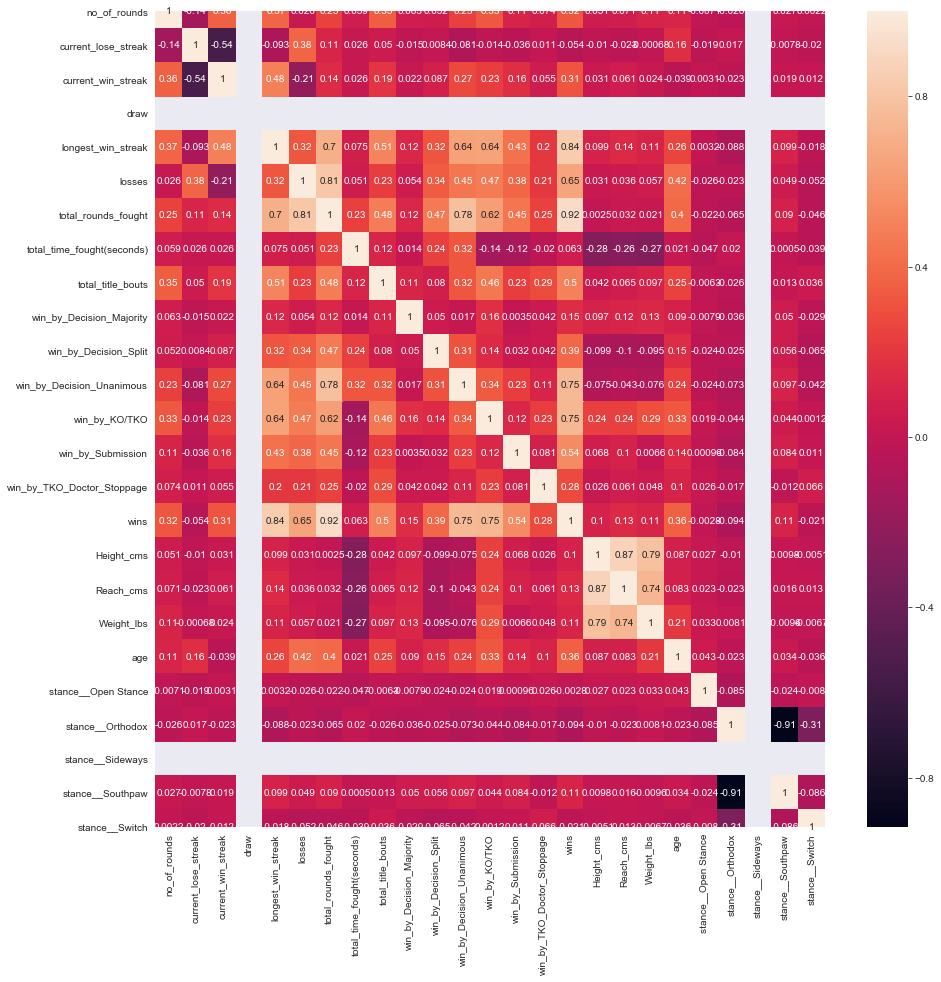

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(x_df21.corr(), annot=True)

In [151]:
for i, c in enumerate(df_post2001.columns):
    print (i, c)

0 date
1 no_of_rounds
2 current_lose_streak
3 current_win_streak
4 draw
5 longest_win_streak
6 losses
7 total_rounds_fought
8 total_time_fought(seconds)
9 total_title_bouts
10 win_by_Decision_Majority
11 win_by_Decision_Split
12 win_by_Decision_Unanimous
13 win_by_KO/TKO
14 win_by_Submission
15 win_by_TKO_Doctor_Stoppage
16 wins
17 Height_cms
18 Reach_cms
19 Weight_lbs
20 age
21 stance__Open Stance
22 stance__Orthodox
23 stance__Sideways
24 stance__Southpaw
25 stance__Switch
26 TIME
27 TIMEmod
28 avg_BODY_att
29 avg_BODY_landed
30 avg_CLINCH_att
31 avg_CLINCH_landed
32 avg_DISTANCE_att
33 avg_DISTANCE_landed
34 avg_GROUND_att
35 avg_GROUND_landed
36 avg_HEAD_att
37 avg_HEAD_landed
38 avg_KD
39 avg_LEG_att
40 avg_LEG_landed
41 avg_PASS
42 avg_REV
43 avg_SIG_STR_att
44 avg_SIG_STR_landed
45 avg_SIG_STR_pct
46 avg_SUB_ATT
47 avg_TD_att
48 avg_TD_landed
49 avg_TD_pct
50 avg_TOTAL_STR_att
51 avg_TOTAL_STR_landed
52 Red_win
53 Draw_win


In [154]:
x_post2001 = df_post2001[df_post2001.columns[2:26]]
y_post2001 = df_post2001[df_post2001.columns[27:]]


In [155]:
x_post2001

current_lose_streak  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        1.0   
Aaron RileyJoe Brammer2010-05-29                          1.0   
Aaron RileyJorge Gurgel2008-11-15                         2.0   
Aaron RileyJustin Salas2013-07-27                         1.0   
Aaron RileyShane Nelson2009-08-08                         1.0   
...                                                       ...   
Zak CummingsTrevin Giles2019-05-18                        0.0   
Zhang LipengChris Wade2015-01-18                          0.0   
Zhang LipengKajan Johnson2015-05-16                       1.0   
Zubaira TukhugovErnest Chavez2014-10-04                   1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                  0.0   

                                          current_win_streak  draw  \
newindex                                                             
Aaron PhillipsMatt Hobar2014-08-23                       0.0   0.0   
Aaron RileyJoe Brammer2010-05-29                         0.0   0.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0   0.0   
Aaron RileyJustin Salas2013-07-27                        0.0   0.0   
Aaron RileyShane Nelson2009-08-08                        0.0   0.0   
...                                                      ...   ...   
Zak CummingsTrevin Giles2019-05-18                       2.0   0.0   
Zhang LipengChris Wade2015-01-18                         1.0   0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0   0.0   
Zubaira TukhugovErnest Chavez2014-10-04                  0.0   0.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0   0.0   

                                          longest_win_streak  losses  \
newindex                                                               
Aaron PhillipsMatt Hobar2014-08-23                       0.0     1.0   
Aaron RileyJoe Brammer2010-05-29                         1.0     4.0   
Aaron RileyJorge Gurgel2008-11-15                        0.0     2.0   
Aaron RileyJustin Salas2013-07-27                        1.0     5.0   
Aaron RileyShane Nelson2009-08-08                        1.0     3.0   
...                                                      ...     ...   
Zak CummingsTrevin Giles2019-05-18                       2.0     0.0   
Zhang LipengChris Wade2015-01-18                         1.0     0.0   
Zhang LipengKajan Johnson2015-05-16                      0.0     1.0   
Zubaira TukhugovErnest Chavez2014-10-04                  1.0     1.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 1.0     3.0   

                                          total_rounds_fought  \
newindex                                                        
Aaron PhillipsMatt Hobar2014-08-23                        3.0   
Aaron RileyJoe Brammer2010-05-29                         13.0   
Aaron RileyJorge Gurgel2008-11-15                         4.0   
Aaron RileyJustin Salas2013-07-27                        17.0   
Aaron RileyShane Nelson2009-08-08                         8.0   
...                                                       ...   
Zak CummingsTrevin Giles2019-05-18                        5.0   
Zhang LipengChris Wade2015-01-18                          1.0   
Zhang LipengKajan Johnson2015-05-16                       3.0   
Zubaira TukhugovErnest Chavez2014-10-04                   6.0   
Zubaira TukhugovPhillipe Nover2015-12-10                 10.0   

                                          total_time_fought(seconds)  \
newindex                                                               
Aaron PhillipsMatt Hobar2014-08-23                        900.000000   
Aaron RileyJoe Brammer2010-05-29                          603.666667   
Aaron RileyJorge Gurgel2008-11-15                         600.000000   
Aaron RileyJustin Salas2013-07-27                         602.750000   
Aaron RileyShane Nelson2009-08-08                         536.000000  

In [156]:
y_post2001

TIMEmod  avg_BODY_att  \
newindex                                                          
Aaron PhillipsMatt Hobar2014-08-23            900     14.000000   
Aaron RileyJoe Brammer2010-05-29              900     14.333333   
Aaron RileyJorge Gurgel2008-11-15             900     12.500000   
Aaron RileyJustin Salas2013-07-27             900     13.500000   
Aaron RileyShane Nelson2009-08-08             900     13.250000   
...                                           ...           ...   
Zak CummingsTrevin Giles2019-05-18            841      7.000000   
Zhang LipengChris Wade2015-01-18              900      0.000000   
Zhang LipengKajan Johnson2015-05-16           900     10.000000   
Zubaira TukhugovErnest Chavez2014-10-04       261     14.500000   
Zubaira TukhugovPhillipe Nover2015-12-10      900      6.500000   

                                          avg_BODY_landed  avg_CLINCH_att  \
newindex                                                                    
Aaron PhillipsMatt Hobar2014-08-23                  12.00           6.000   
Aaron RileyJoe Brammer2010-05-29                    11.50          23.000   
Aaron RileyJorge Gurgel2008-11-15                   11.00          28.000   
Aaron RileyJustin Salas2013-07-27                   10.50          19.625   
Aaron RileyShane Nelson2009-08-08                   11.00          21.250   
...                                                   ...             ...   
Zak CummingsTrevin Giles2019-05-18                   6.00           2.500   
Zhang LipengChris Wade2015-01-18                     0.00           0.000   
Zhang LipengKajan Johnson2015-05-16                  5.00           2.000   
Zubaira TukhugovErnest Chavez2014-10-04              8.50           8.500   
Zubaira TukhugovPhillipe Nover2015-12-10             4.25           7.000   

                                          avg_CLINCH_landed  avg_DISTANCE_att  \
newindex                                                                        
Aaron PhillipsMatt Hobar2014-08-23                 3.000000         26.000000   
Aaron RileyJoe Brammer2010-05-29                  13.833333         69.166667   
Aaron RileyJorge Gurgel2008-11-15                 15.500000         48.000000   
Aaron RileyJustin Salas2013-07-27                 12.375000         68.125000   
Aaron RileyShane Nelson2009-08-08                 13.000000         71.500000   
...                                                     ...               ...   
Zak CummingsTrevin Giles2019-05-18                 2.500000         62.000000   
Zhang LipengChris Wade2015-01-18                   0.000000          1.000000   
Zhang LipengKajan Johnson2015-05-16                2.000000         86.000000   
Zubaira TukhugovErnest Chavez2014-10-04            6.000000         91.000000   
Zubaira TukhugovPhillipe Nover2015-12-10           5.500000         23.750000   

                                          avg_DISTANCE_landed  avg_GROUND_att  \
newindex                                                                        
Aaron PhillipsMatt Hobar2014-08-23                      9.000        8.000000   
Aaron RileyJoe Brammer2010-05-29                       21.500        4.333333   
Aaron RileyJorge Gurgel2008-11-15                      16.000        0.500000   
Aaron RileyJustin Salas2013-07-27                      20.875        3.750000   
Aaron RileyShane Nelson2009-08-08                      26.250        3.250000   
...                                                       ...             ...   
Zak CummingsTrevin Giles2019-05-18                     38.000       18.500000   
Zhang LipengChris Wade2015-01-18                        0.000        0.000000   
Zhang LipengKajan Johnson2015-05-16                    26.000        3.000000   
Zubaira TukhugovErnest Chavez2014-10-04                34.500        1.000000   
Zubaira TukhugovPhillipe Nover2015-12-10                7.000        3.750000   

                                          avg_GROUND_landed 

In [177]:
LassoCV_find_best_target(x_post2001, y_post2001['TIMEmod'], poly_order = 3, max_iterations=5000)

R2 for training data fitting to variable: TIMEmod is 0.06162224153477114. 

        CVS = 0.03974877206868259 . 

        R2 for testing data fitting to variable: TIMEmod is 0.042406937586174864 
.


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=5000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

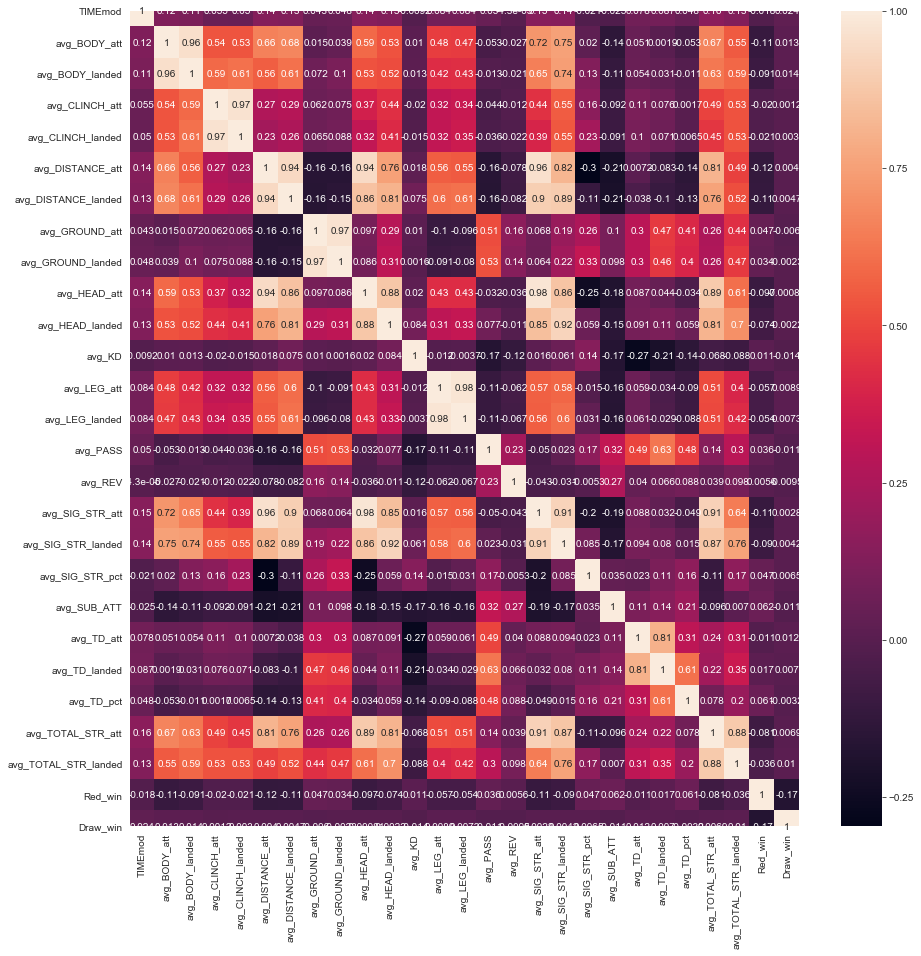

In [159]:
plt.figure(figsize=(15,15))
sns.heatmap(y_post2001.corr(), annot=True)

In [160]:
y_post2001.describe()

TIMEmod  avg_BODY_att  avg_BODY_landed  avg_CLINCH_att  \
count  8093.000000   8093.000000      8093.000000     8093.000000   
mean    636.042629      8.979096         6.257601        8.341240   
std     360.841280      6.943417         4.909317        7.311754   
min       7.000000      0.000000         0.000000        0.000000   
25%     281.000000      4.000000         2.800000        3.444444   
50%     833.000000      7.357143         5.000000        6.647059   
75%     900.000000     12.333333         8.666667       11.300000   
max    1500.000000     51.000000        39.000000       87.000000   

       avg_CLINCH_landed  avg_DISTANCE_att  avg_DISTANCE_landed  \
count        8093.000000       8093.000000          8093.000000   
mean            5.637877         54.946647            20.013309   
std             5.260655         40.086977            15.421745   
min             0.000000          0.000000             0.000000   
25%             2.000000         25.000000             8.750000   
50%             4.400000         47.000000            16.111111   
75%             7.666667         75.666667            28.000000   
max            68.000000        287.500000           131.000000   

       avg_GROUND_att  avg_GROUND_landed  avg_HEAD_att  ...  \
count     8093.000000        8093.000000   8093.000000  ...   
mean         9.214609           6.089042     57.200672  ...   
std          8.840750           5.831037     34.766451  ...   
min          0.000000           0.000000      0.000000  ...   
25%          3.000000           2.000000     33.000000  ...   
50%          7.000000           4.708333     51.000000  ...   
75%         12.578947           8.333333     76.000000  ...   
max         96.000000          53.000000    277.000000  ...   

       avg_SIG_STR_landed  avg_SIG_STR_pct  avg_SUB_ATT   avg_TD_att  \
count         8093.000000      8093.000000  8093.000000  8093.000000   
mean            31.740228         0.457964     0.546133     2.980990   
std             17.896425         0.118654     0.684101     2.761958   
min              0.000000         0.000000     0.000000     0.000000   
25%             19.333333         0.390000     0.000000     1.000000   
50%             29.000000         0.455000     0.333333     2.285714   
75%             41.750000         0.523636     0.857143     4.333333   
max            154.000000         1.000000     9.000000    30.000000   

       avg_TD_landed   avg_TD_pct  avg_TOTAL_STR_att  avg_TOTAL_STR_landed  \
count    8093.000000  8093.000000        8093.000000           8093.000000   
mean        1.269037     0.322111          95.163562             51.949536   
std         1.252394     0.243922          48.332170             27.445987   
min         0.000000     0.000000           0.000000              0.000000   
25%         0.333333     0.140000          62.000000             33.454545   
50%         1.000000     0.310000          90.333333             49.000000   
75%         2.000000     0.478000         123.166667             66.375000   
max        11.000000     1.000000         360.000000            230.000000   

           Red_win     Draw_win  
count  8093.000000  8093.000000  
mean      0.650068     0.015445  
std       0.476978     0.123324  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 27 columns]

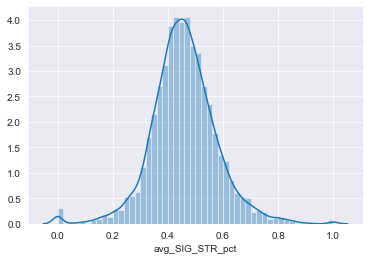

In [163]:
sns.distplot(y_post2001.avg_SIG_STR_pct)

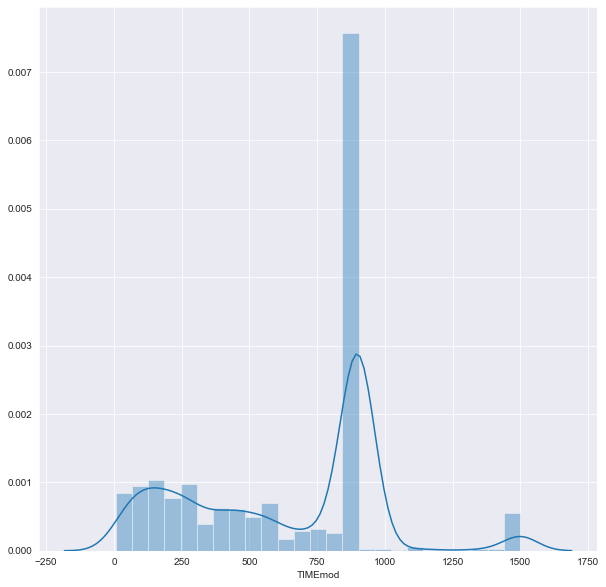

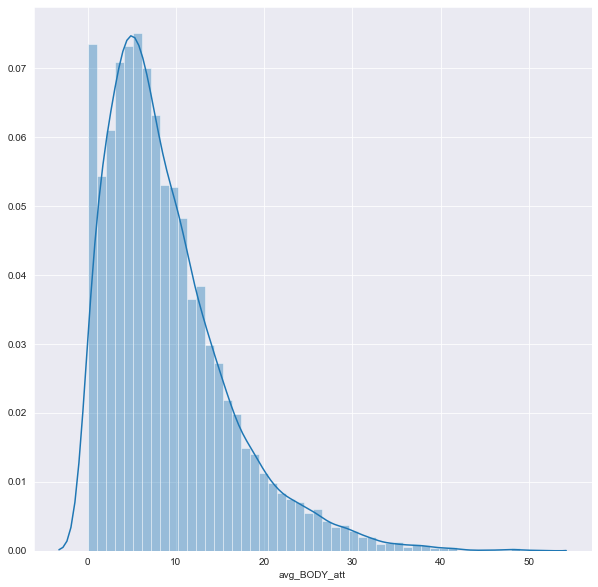

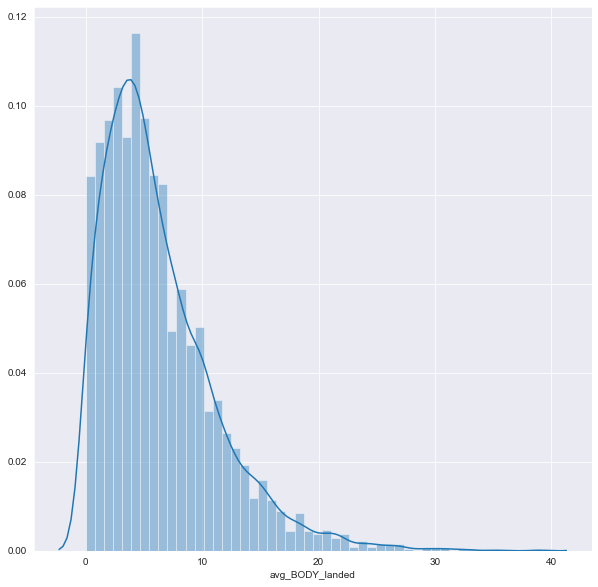

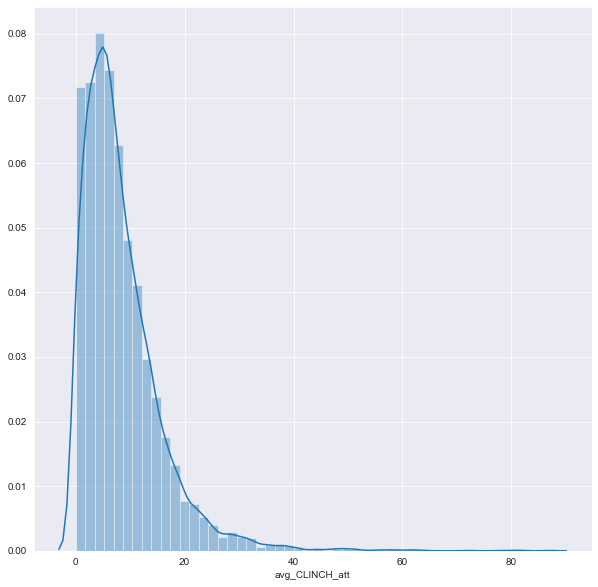

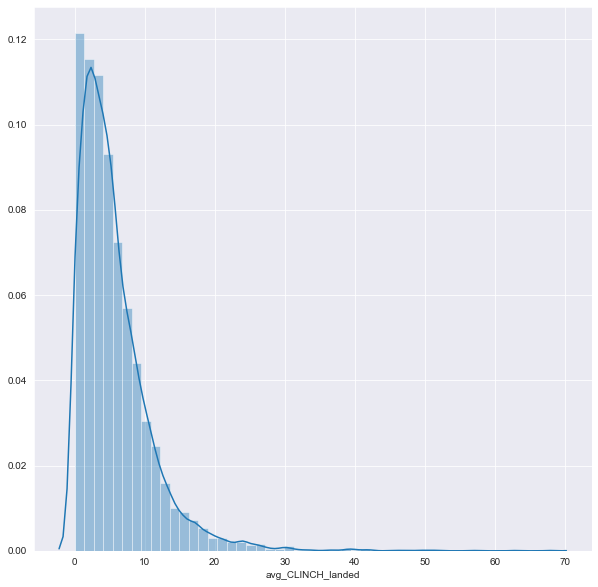

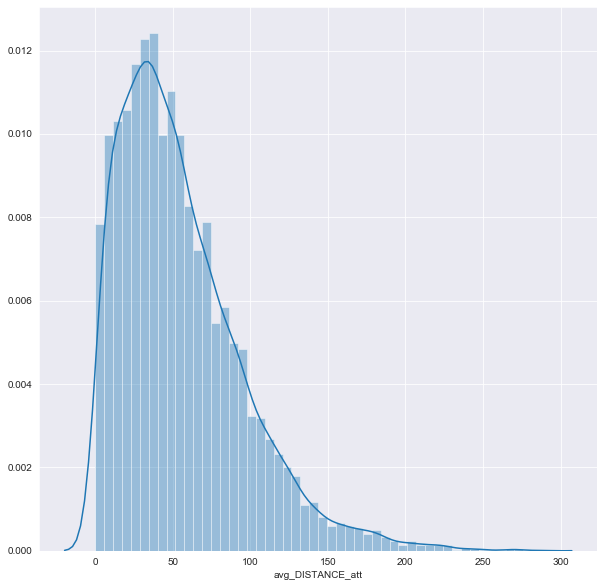

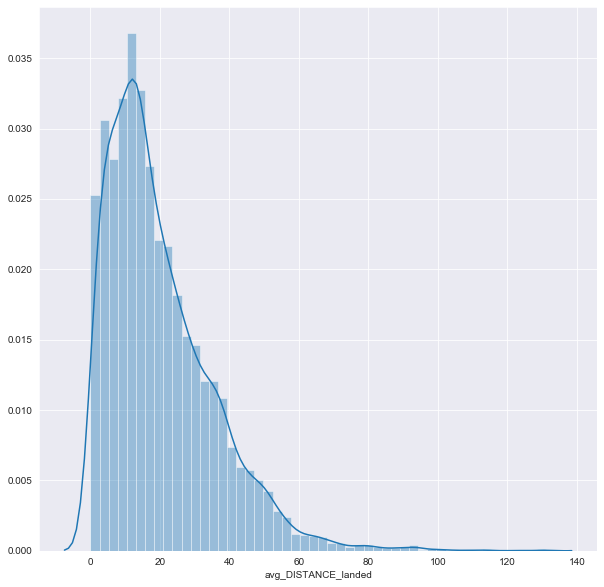

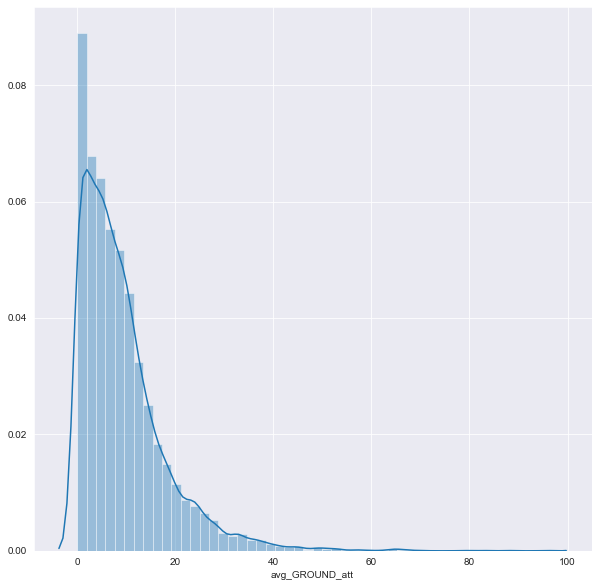

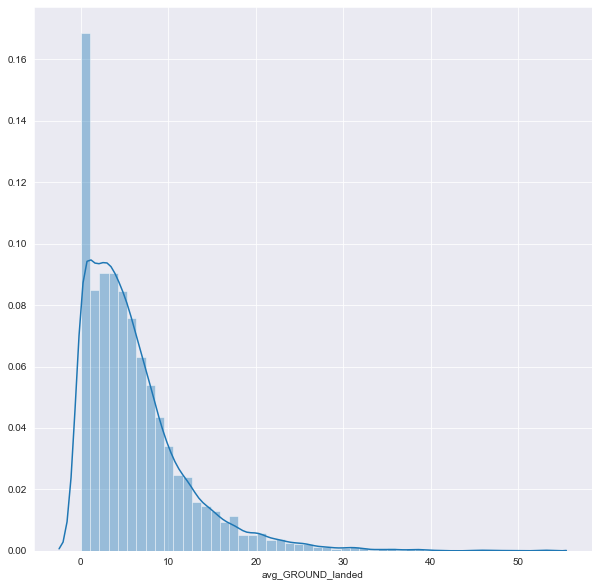

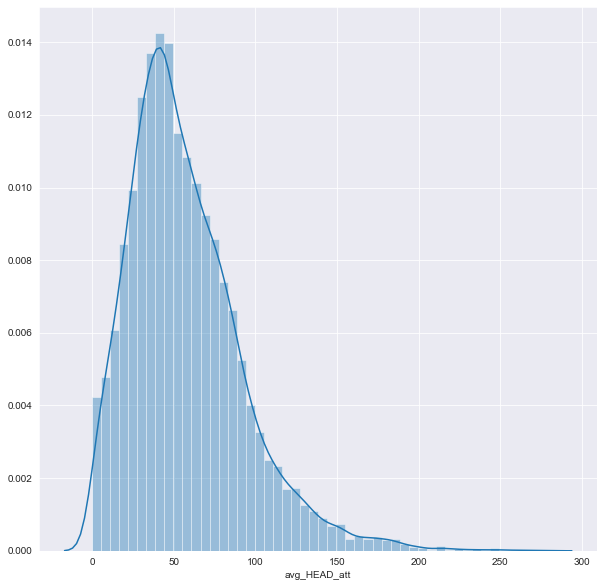

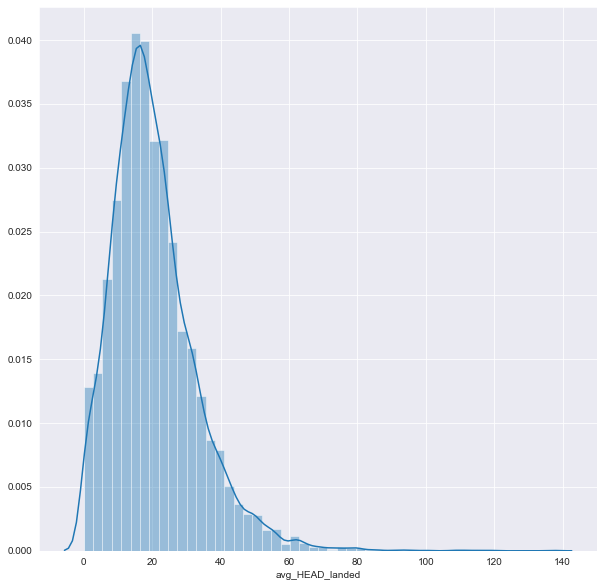

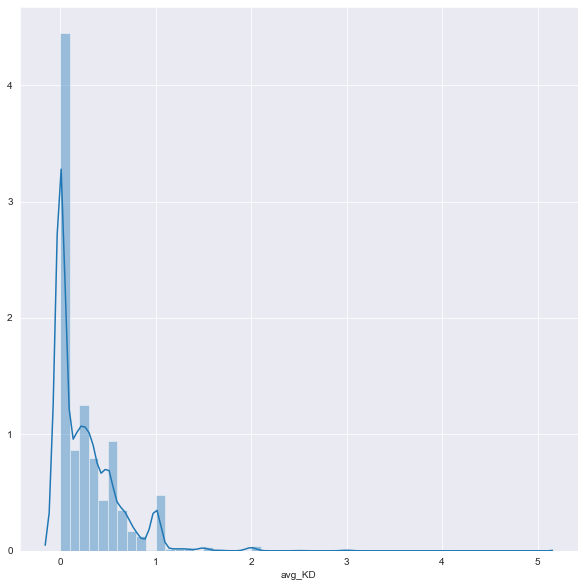

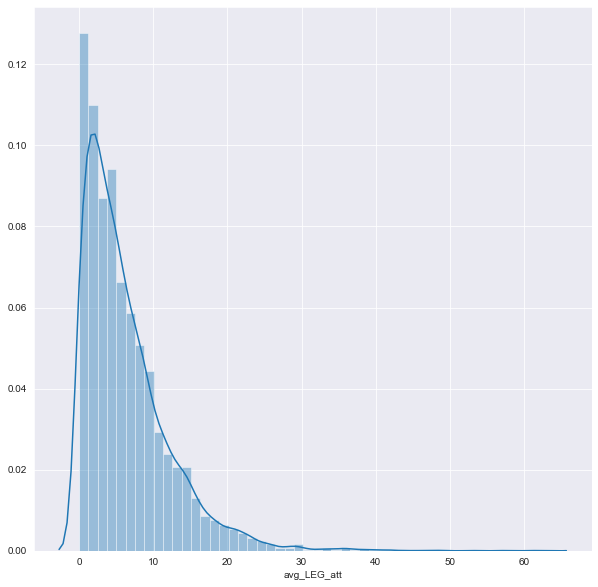

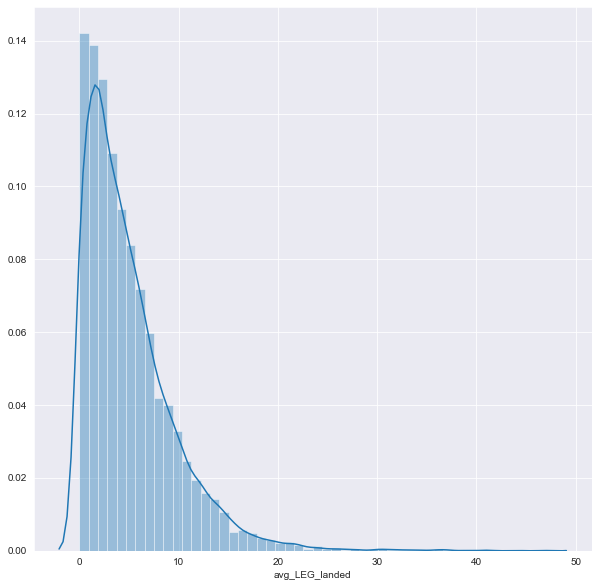

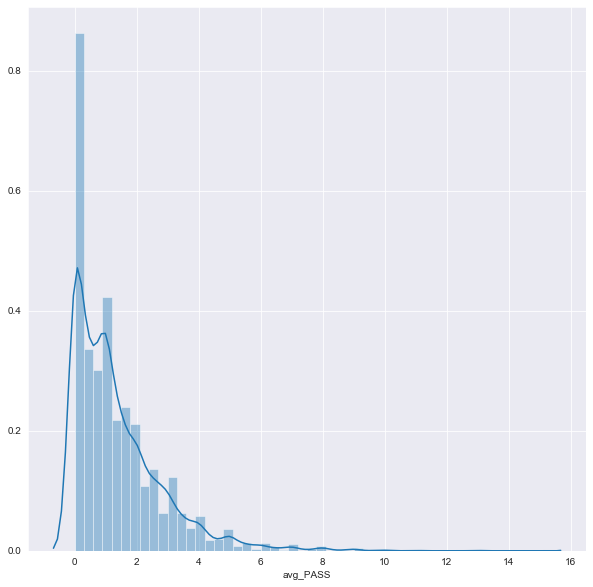

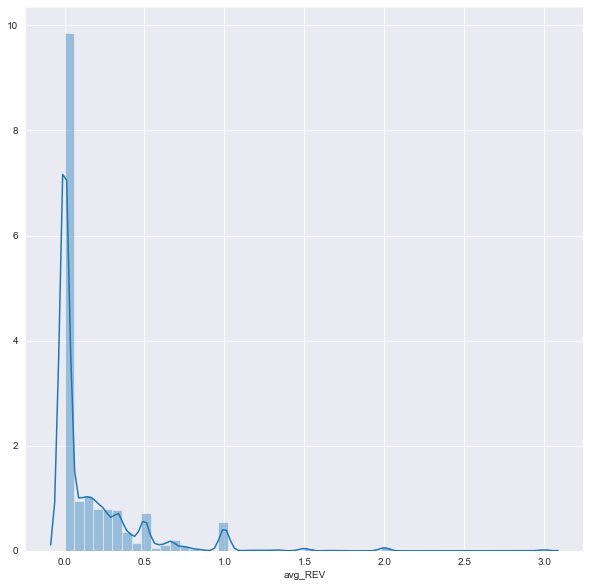

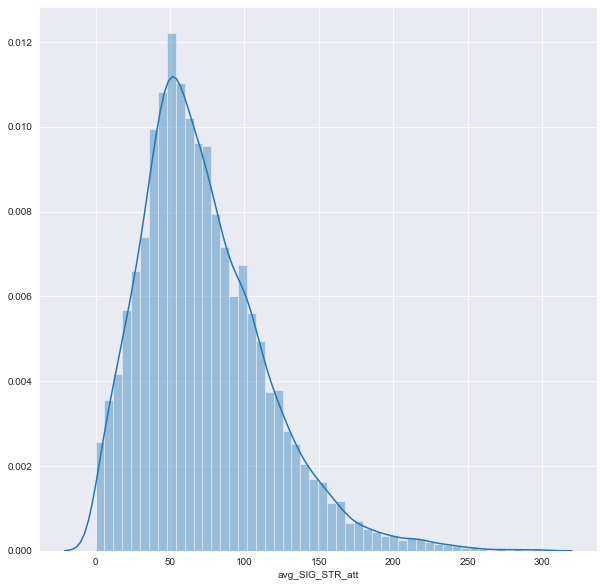

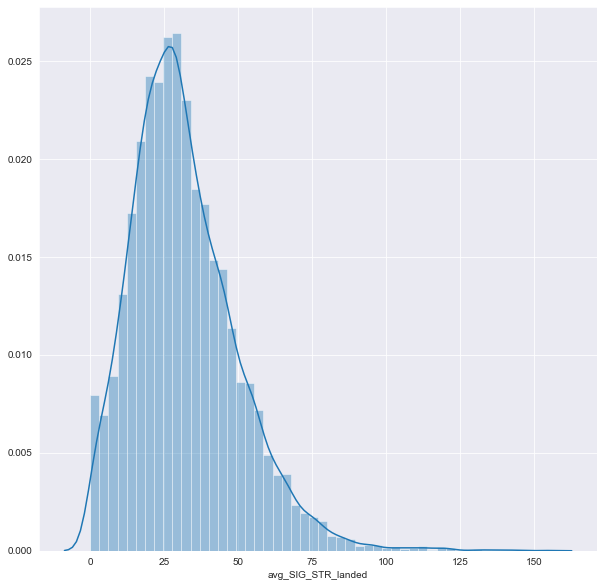

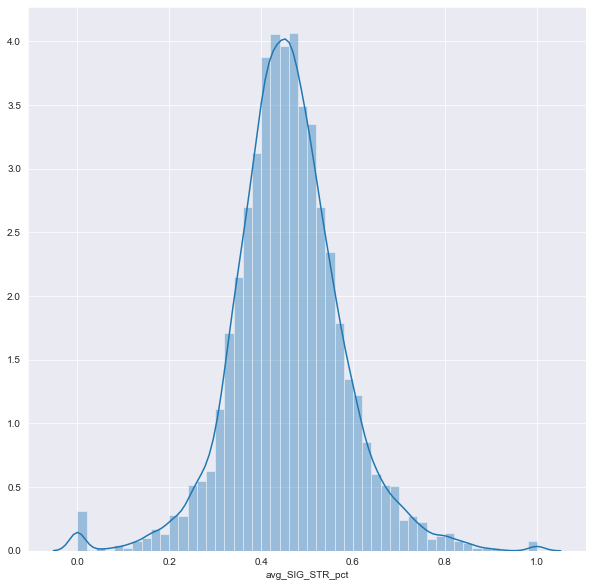

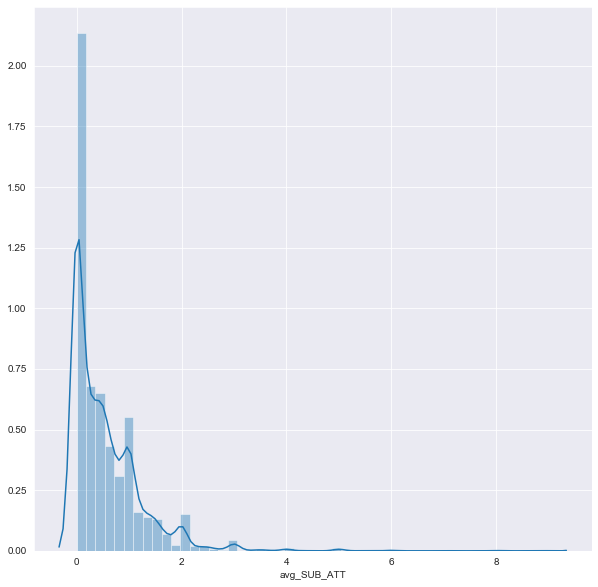

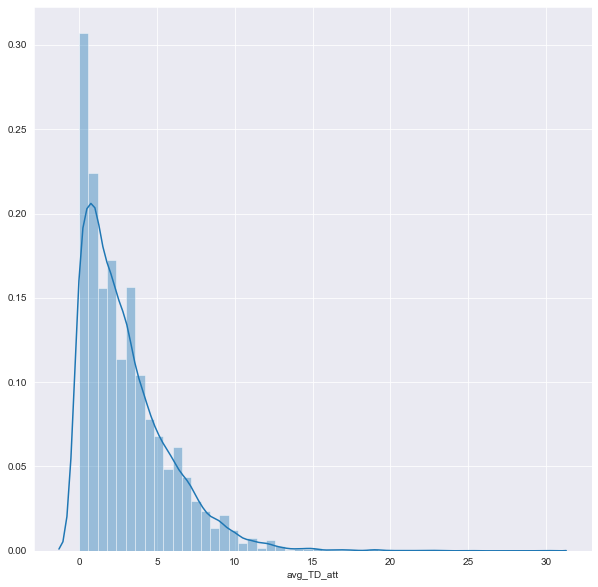

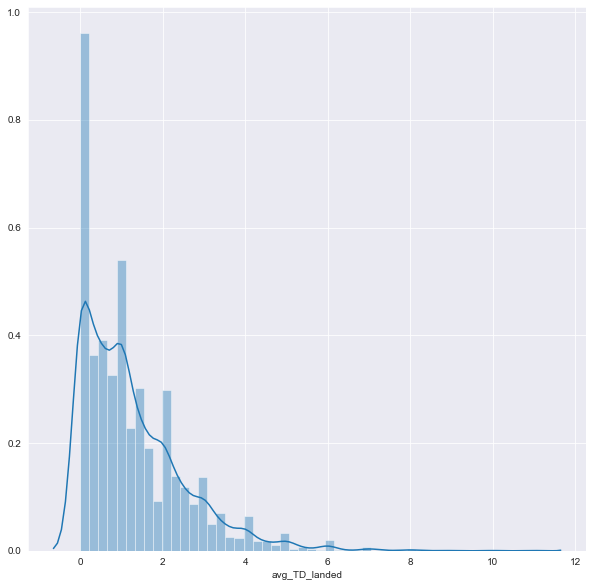

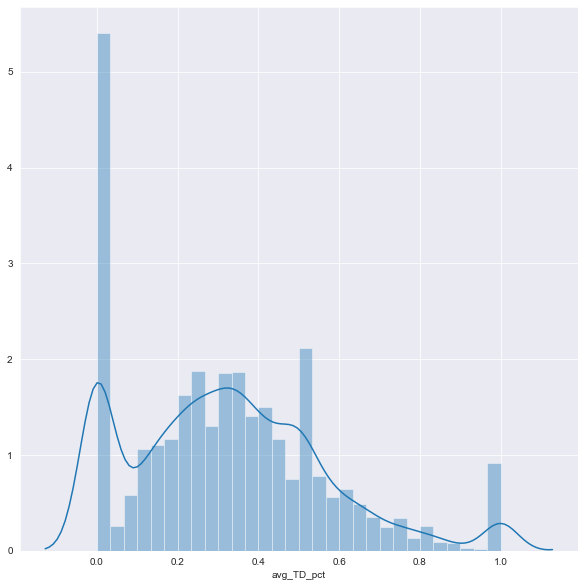

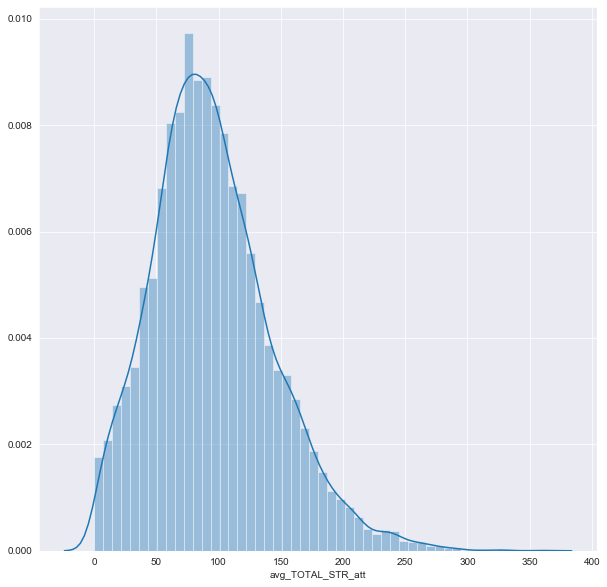

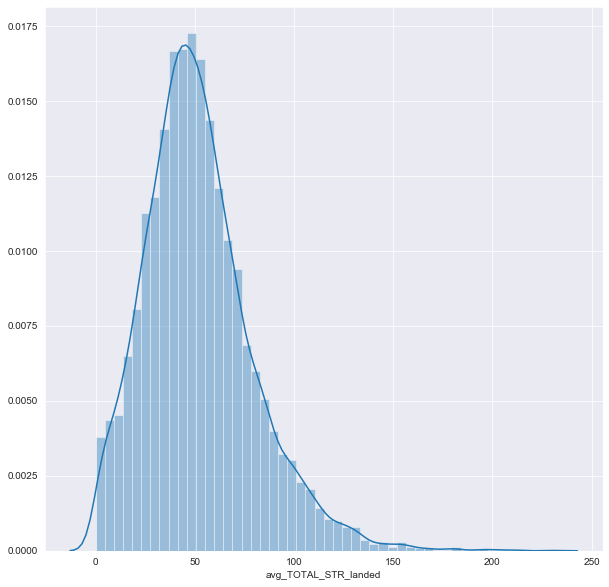

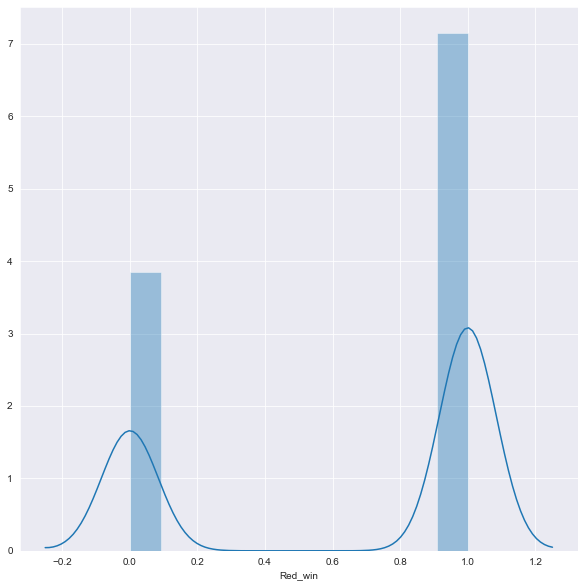

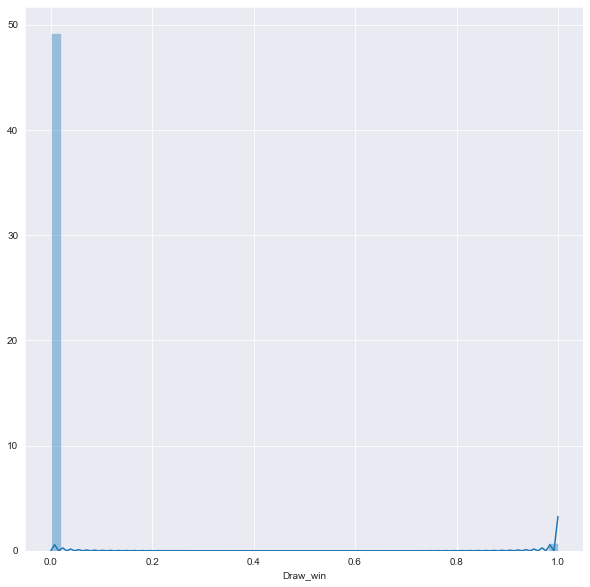

In [162]:
for c in y_post2001.columns:
    plt.figure(figsize=(10,10))
    sns.distplot(y_post2001[c])
    plt.show()

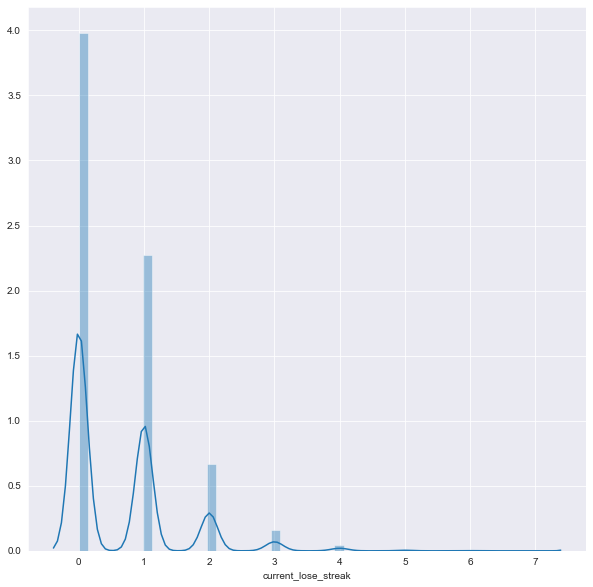

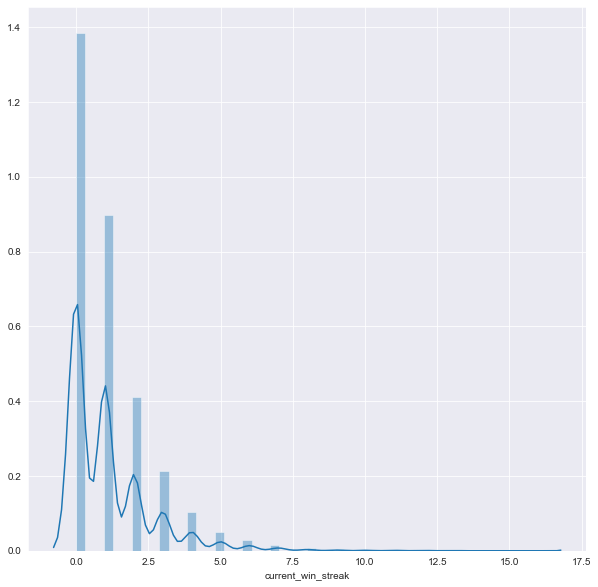

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


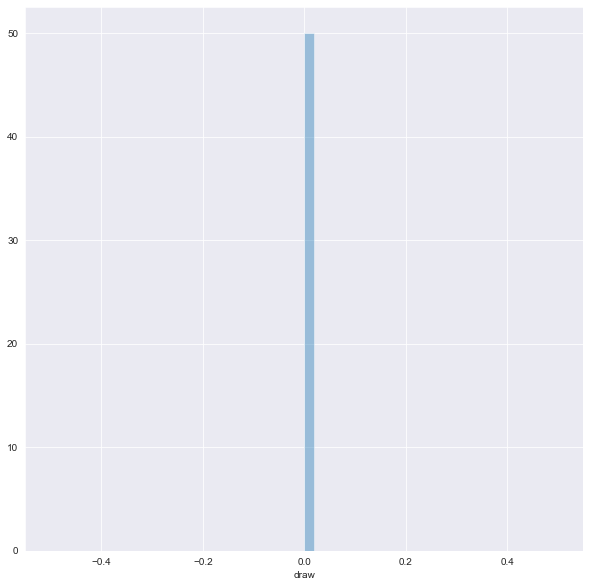

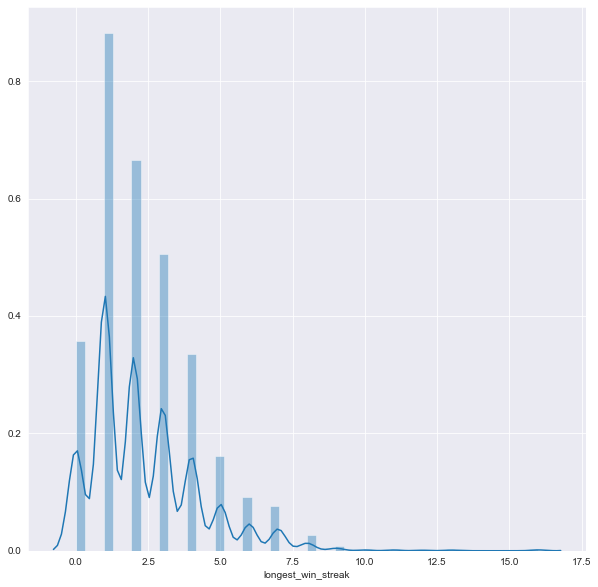

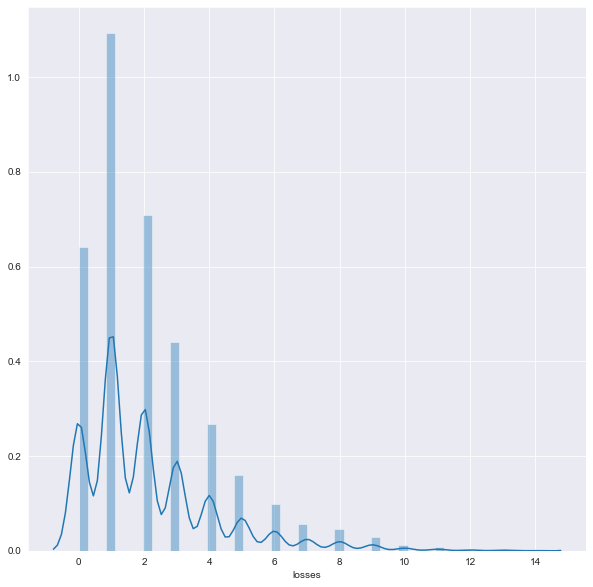

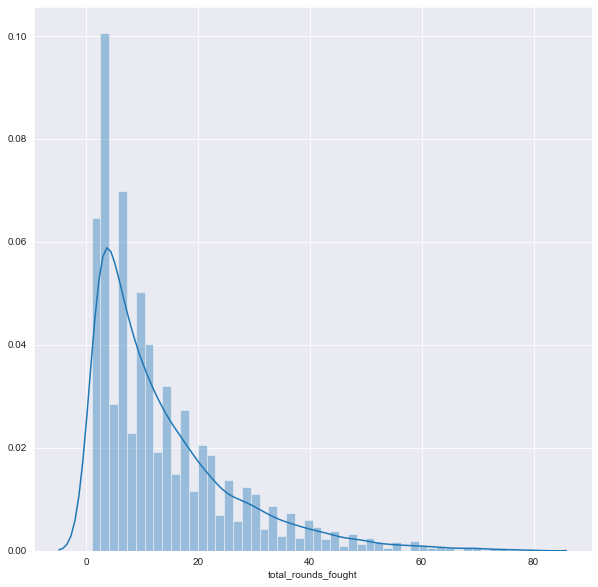

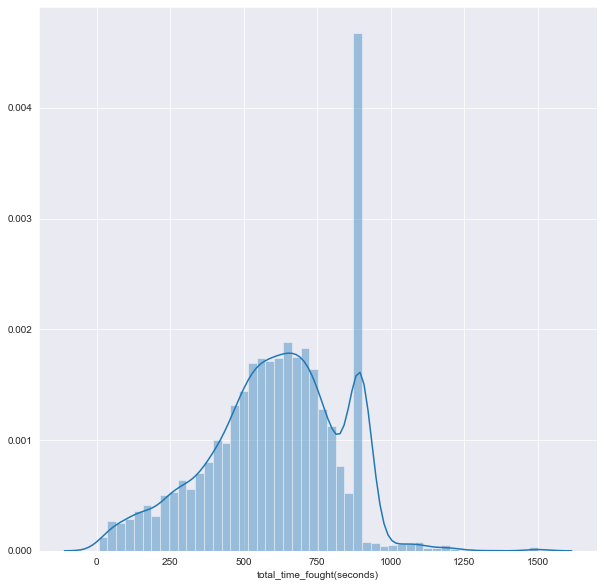

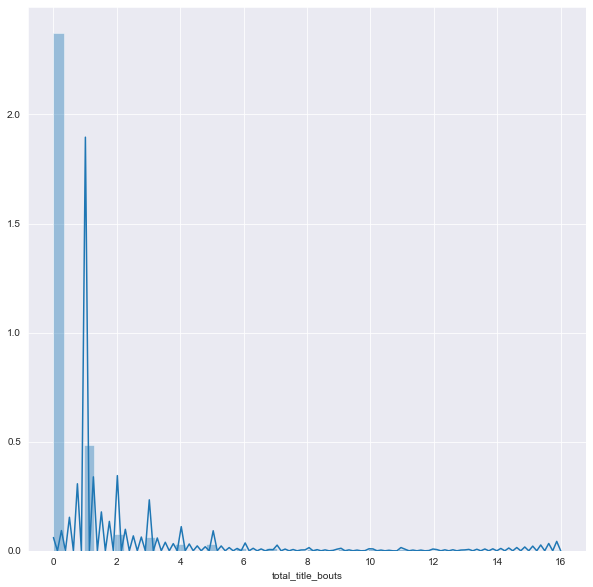

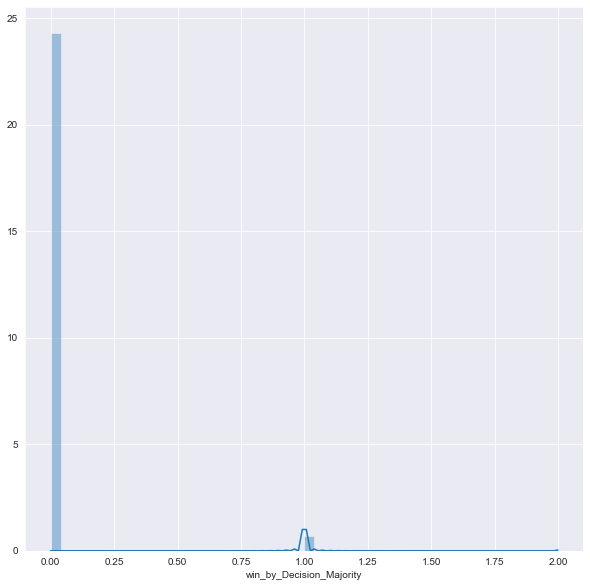

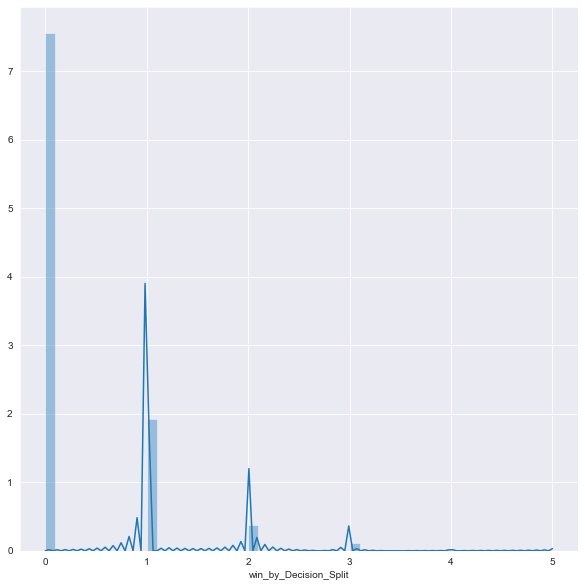

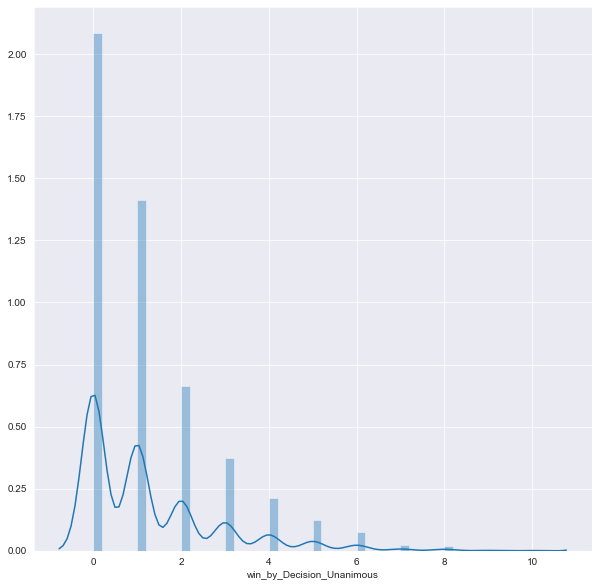

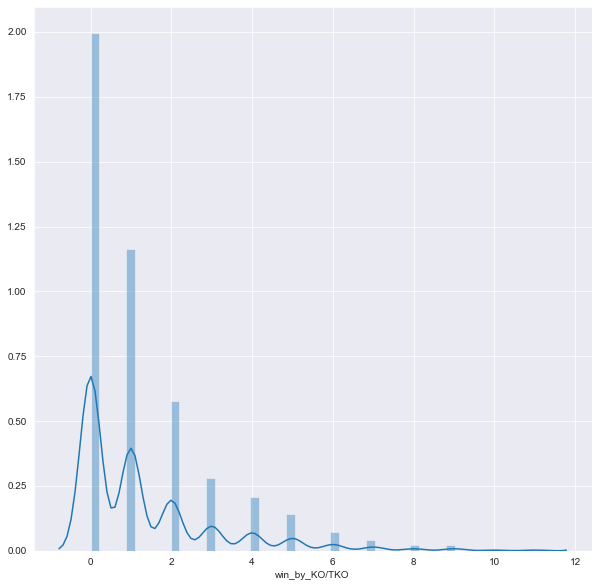

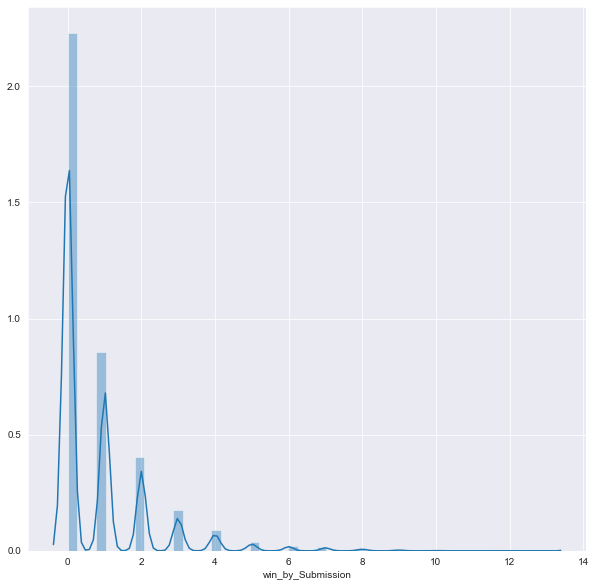

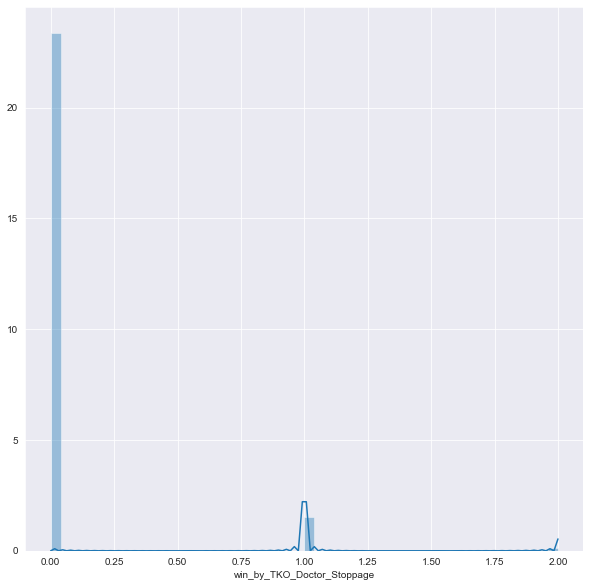

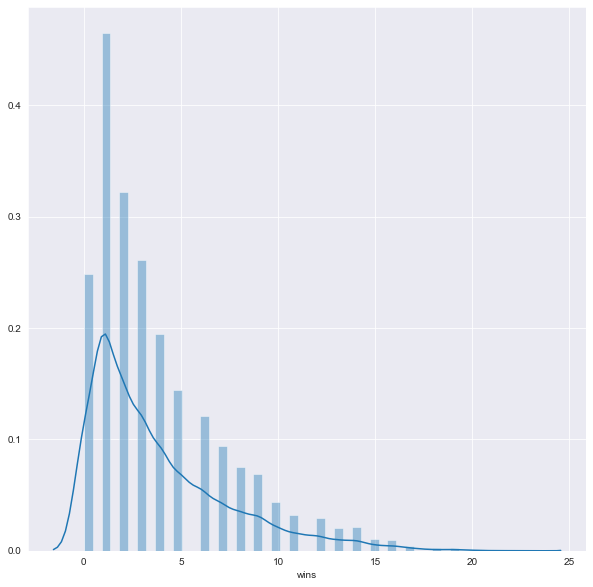

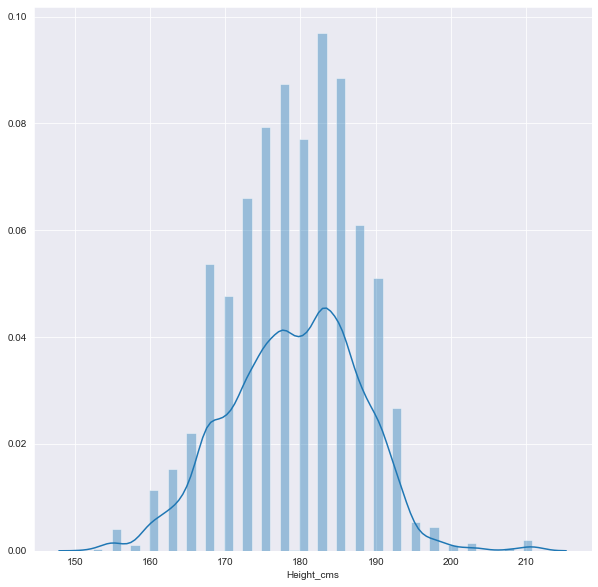

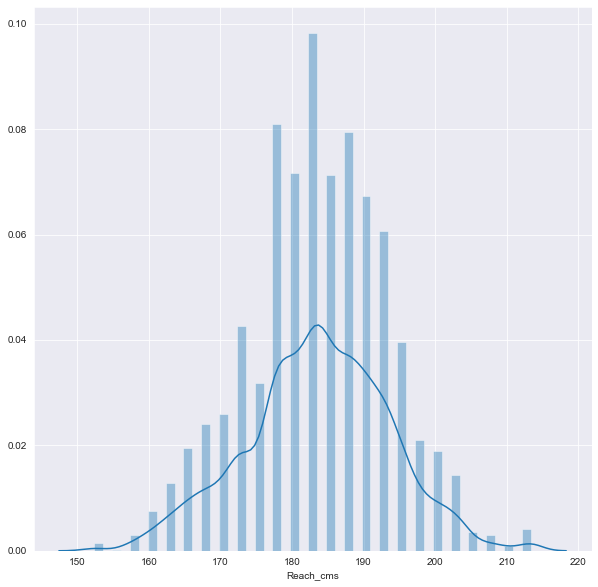

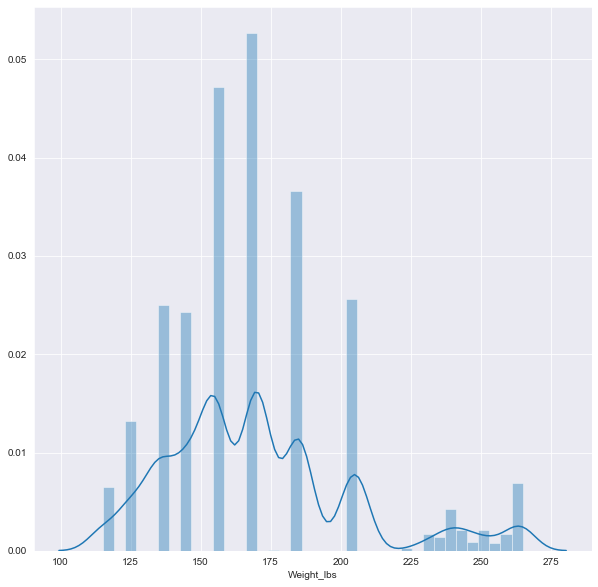

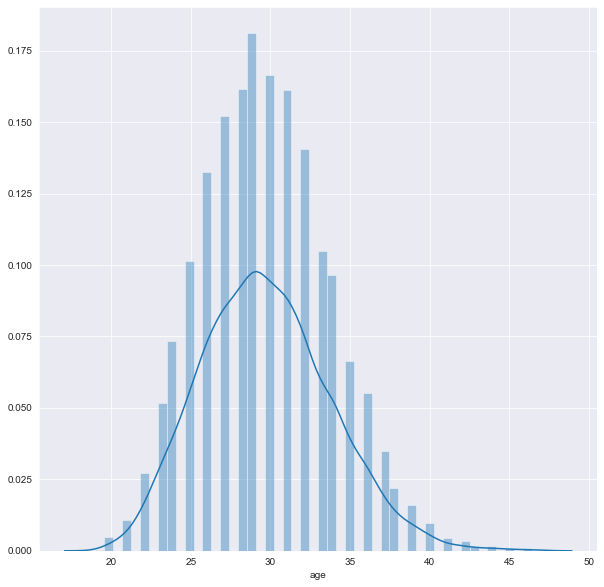

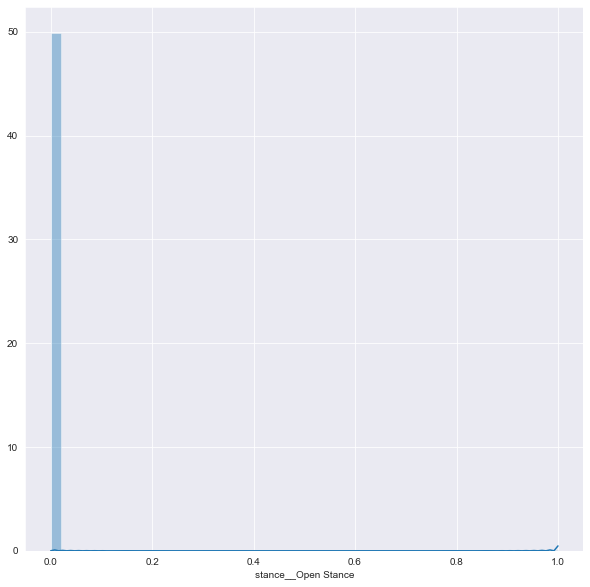

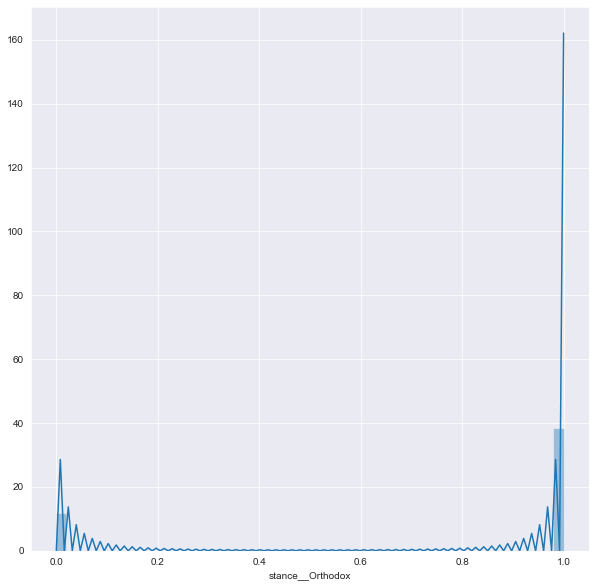

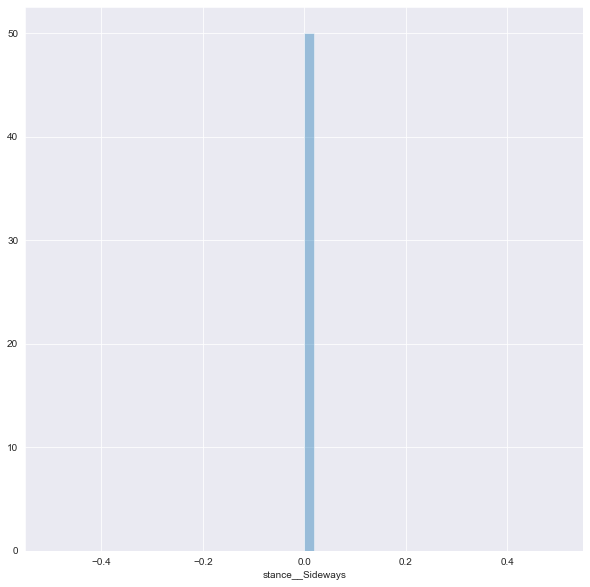

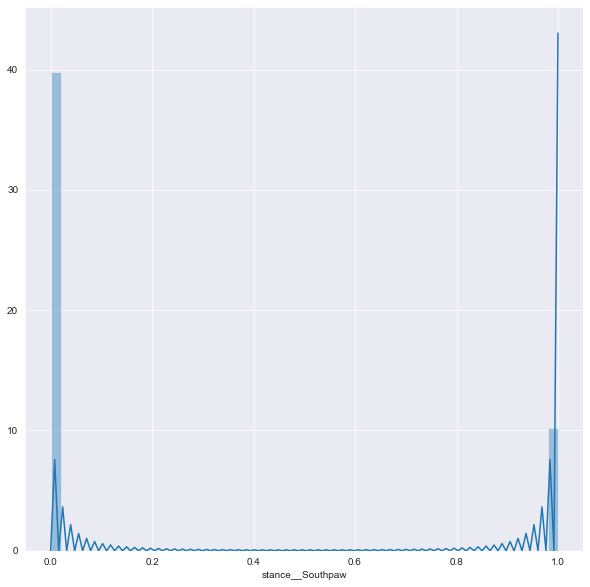

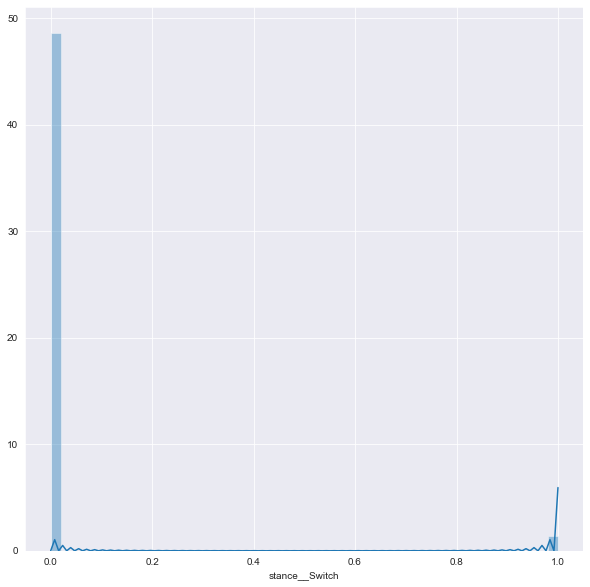

In [164]:
for c in x_post2001.columns:
    plt.figure(figsize=(10,10))
    sns.distplot(x_post2001[c])
    plt.show()

In [178]:
# in hindsight, trying to use all the x vars we had , maybe we should be more selective with target vars

LassoCV_find_best_target(x_post2001, y_post2001['avg_SIG_STR_pct'])

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011499878758861826, tolerance: 0.007397705788119339
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017470726330259367, tolerance: 0.007397705788119339
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011269177808799213, tolerance: 0.007397705788119339
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6142119061918336, tolerance: 0.0091247935362557
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010495272634678088, tolerance: 0.0066927841960179165
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011729170866445315, tolerance: 0.0066927841960179165
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015371100757583633, tolerance: 0.006619404783786323
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014862340431321286, tolerance: 0.006619404783786323
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01609867221263528, tolerance: 0.006619404783786323
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05778308790864628, tolerance: 0.006639988915697785
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006710497126803716, tolerance: 0.006568258593002284
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006605287122802395, tolerance: 0.006568258593002284
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007578956160173789, tolerance: 0.006545378053832595
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.802169032887683, tolerance: 0.00828903387926712
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007527393179572073, tolerance: 0.00664544483010031
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16304383423156565, tolerance: 0.0065186375886985976
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43357572379456144, tolerance: 0.0065186375886985976
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5700141785550983, tolerance: 0.0065186375886985976
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00712631010384257, tolerance: 0.006478752646975111
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00947473240692176, tolerance: 0.006478752646975111
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011271798552719758, tolerance: 0.006478752646975111
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/le

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017495361715127444, tolerance: 0.006592426528092855
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08980649101305005, tolerance: 0.006592426528092855
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008749911012536415, tolerance: 0.006545147996486961
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006755458287400984, tolerance: 0.00658467388270851
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009560539289417136, tolerance: 0.00658467388270851
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009766400820410581, tolerance: 0.00658467388270851
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/lea

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01333261066641711, tolerance: 0.006529286939426421
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011885060778197953, tolerance: 0.006529286939426421
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009227589246691537, tolerance: 0.006529286939426421
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27654425658607806, tolerance: 0.006572746099141009
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5727328230247082, tolerance: 0.006572746099141009
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012379880342663796, tolerance: 0.006572746099141009
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/lea

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04540668573551443, tolerance: 0.006504194800379264
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0543271829174472, tolerance: 0.006504194800379264
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.060249211099133504, tolerance: 0.006504194800379264
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/lea

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007981214042274587, tolerance: 0.0064246367109367245
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0213750966246522, tolerance: 0.0064246367109367245
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028081601019430025, tolerance: 0.0064246367109367245
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.42558168994303003, tolerance: 0.008239777637344901
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007304362756670457, tolerance: 0.006622175187713777
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008847398187526778, tolerance: 0.006622175187713777
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pytho

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00928063491517861, tolerance: 0.006453738119261121
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026370829035457177, tolerance: 0.006453738119261121
  tol, rng, random, positive)


R2 for training data fitting to variable: avg_SIG_STR_pct is 0.20549054382131804. 

        CVS = 0.1703184888568659 . 

        R2 for testing data fitting to variable: avg_SIG_STR_pct is 0.1665973568523339 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.355245190491786, tolerance: 0.008175859365148816
  positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [179]:
for i, c in enumerate(x_post2001):
    print(i,c)

0 current_lose_streak
1 current_win_streak
2 draw
3 longest_win_streak
4 losses
5 total_rounds_fought
6 total_time_fought(seconds)
7 total_title_bouts
8 win_by_Decision_Majority
9 win_by_Decision_Split
10 win_by_Decision_Unanimous
11 win_by_KO/TKO
12 win_by_Submission
13 win_by_TKO_Doctor_Stoppage
14 wins
15 Height_cms
16 Reach_cms
17 Weight_lbs
18 age
19 stance__Open Stance
20 stance__Orthodox
21 stance__Sideways
22 stance__Southpaw
23 stance__Switch


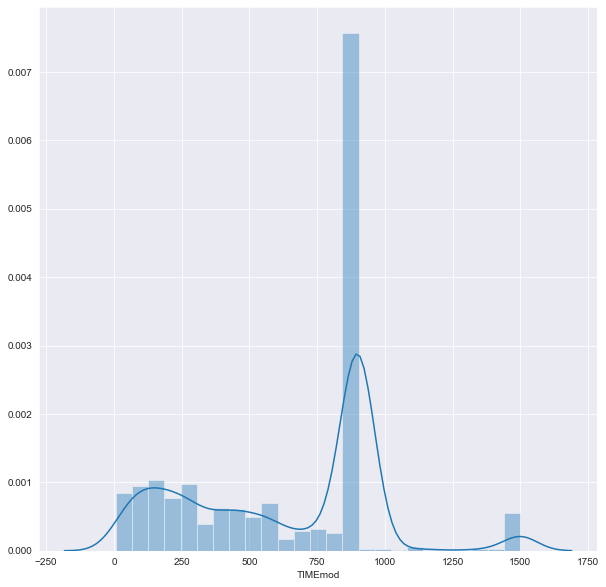

In [181]:
plt.figure(figsize=(10,10))
sns.distplot(y_post2001.TIMEmod)

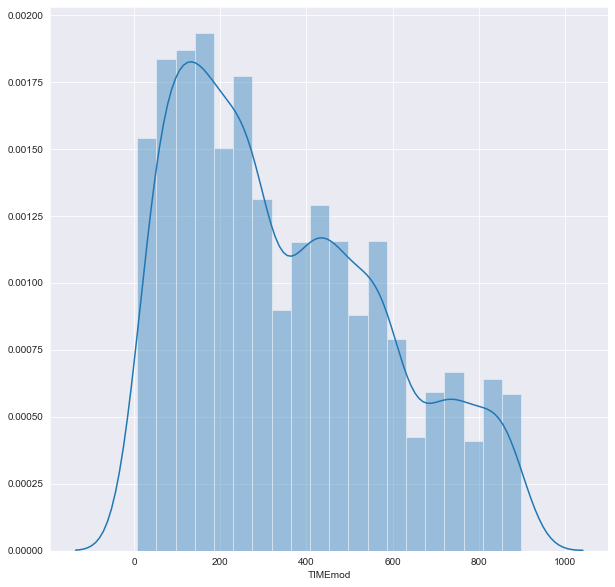

In [191]:
time_norm = y_post2001.loc[y_post2001.TIMEmod<900]

plt.figure(figsize=(10,10))
sns.distplot((time_norm.TIMEmod))

In [184]:
len(np.log(time_norm))

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


4222

In [200]:
len(df_post2001) - len(time_norm)

3871

In [217]:
# repeating process but this time excluding fights that went the distance, be they champ or non-champ fights
df_post2001_non_finish = df_post2001.loc[df_post2001.TIMEmod!=900]
df_post2001_non_finish = df_post2001_non_finish.loc[df_post2001_non_finish.TIMEmod!=1500]

df_post2001_non_finish.head()

date  no_of_rounds  \
newindex                                                            
Aaron SimpsonEd Herman2009-08-29         2009-08-29             3   
Aaron SimpsonMike Pierce2012-10-05       2012-10-05             3   
Abdul Razak AlhassanNiko Price2018-09-08 2018-09-08             3   
Abel TrujilloJames Vick2017-02-04        2017-02-04             3   
Abel TrujilloRoger Bowling2013-12-14     2013-12-14             3   

                                          current_lose_streak  \
newindex                                                        
Aaron SimpsonEd Herman2009-08-29                          0.0   
Aaron SimpsonMike Pierce2012-10-05                        0.0   
Abdul Razak AlhassanNiko Price2018-09-08                  0.0   
Abel TrujilloJames Vick2017-02-04                         0.0   
Abel TrujilloRoger Bowling2013-12-14                      2.0   

                                          current_win_streak  draw  \
newindex                                                             
Aaron SimpsonEd Herman2009-08-29                         1.0   0.0   
Aaron SimpsonMike Pierce2012-10-05                       1.0   0.0   
Abdul Razak AlhassanNiko Price2018-09-08                 2.0   0.0   
Abel TrujilloJames Vick2017-02-04                        3.0   0.0   
Abel TrujilloRoger Bowling2013-12-14                     0.0   0.0   

                                          longest_win_streak  losses  \
newindex                                                               
Aaron SimpsonEd Herman2009-08-29                         1.0     0.0   
Aaron SimpsonMike Pierce2012-10-05                       3.0     3.0   
Abdul Razak AlhassanNiko Price2018-09-08                 2.0     1.0   
Abel TrujilloJames Vick2017-02-04                        3.0     3.0   
Abel TrujilloRoger Bowling2013-12-14                     1.0     2.0   

                                          total_rounds_fought  \
newindex                                                        
Aaron SimpsonEd Herman2009-08-29                          1.0   
Aaron SimpsonMike Pierce2012-10-05                       26.0   
Abdul Razak AlhassanNiko Price2018-09-08                  6.0   
Abel TrujilloJames Vick2017-02-04                        18.0   
Abel TrujilloRoger Bowling2013-12-14                      7.0   

                                          total_time_fought(seconds)  \
newindex                                                               
Aaron SimpsonEd Herman2009-08-29                          100.000000   
Aaron SimpsonMike Pierce2012-10-05                        727.400000   
Abdul Razak AlhassanNiko Price2018-09-08                  360.250000   
Abel TrujilloJames Vick2017-02-04                         515.777778   
Abel TrujilloRoger Bowling2013-12-14                      677.666667   

                                          total_title_bouts  ...  \
newindex                                                     ...   
Aaron SimpsonEd Herman2009-08-29                        0.0  ...   
Aaron SimpsonMike Pierce2012-10-05                      0.0  ...   
Abdul Razak AlhassanNiko Price2018-09-08                0.0  ...   
Abel TrujilloJames Vick2017-02-04                       0.0  ...   
Abel TrujilloRoger Bowling2013-12-14                    0.0  ...   

                                          avg_SIG_STR_landed  avg_SIG_STR_pct  \
newindex                                                                        
Aaron SimpsonEd Herman2009-08-29                   16.000000         0.590000   
Aaron SimpsonMike Pierce2012-10-05                 42.600000         0.550000   
Abdul Razak AlhassanNiko Price2018-09-08           23.750000         0.450000   
Abel TrujilloJames Vick2017-02-04                  25.888889         0.376667   
Abel TrujilloRoger Bowling2013-12-14               39.333333         0.506667   

                                          avg_SUB_ATT  avg_TD_att  \
newindex                            

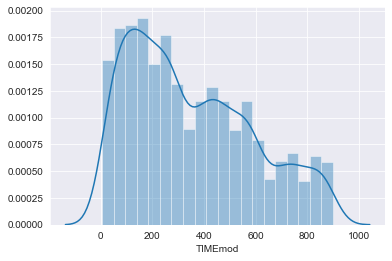

In [231]:
sns.distplot(df_post2001_non_finish.TIMEmod.loc[df_post2001_non_finish.TIMEmod<900])

In [218]:
# splitting dfs again
x_nonfin = df_post2001_non_finish[df_post2001_non_finish.columns[1:26]]
y_nonfin = df_post2001_non_finish[df_post2001_non_finish.columns[27:]]


In [219]:
y_nonfin.head()

TIMEmod  avg_BODY_att  \
newindex                                                          
Aaron SimpsonEd Herman2009-08-29              317      3.000000   
Aaron SimpsonMike Pierce2012-10-05            329     13.100000   
Abdul Razak AlhassanNiko Price2018-09-08       43      2.000000   
Abel TrujilloJames Vick2017-02-04             649      7.444444   
Abel TrujilloRoger Bowling2013-12-14          395     12.666667   

                                          avg_BODY_landed  avg_CLINCH_att  \
newindex                                                                    
Aaron SimpsonEd Herman2009-08-29                 3.000000        2.000000   
Aaron SimpsonMike Pierce2012-10-05               9.300000       23.200000   
Abdul Razak AlhassanNiko Price2018-09-08         1.250000        7.000000   
Abel TrujilloJames Vick2017-02-04                6.111111       10.333333   
Abel TrujilloRoger Bowling2013-12-14            11.333333       15.666667   

                                          avg_CLINCH_landed  avg_DISTANCE_att  \
newindex                                                                        
Aaron SimpsonEd Herman2009-08-29                   2.000000          5.000000   
Aaron SimpsonMike Pierce2012-10-05                17.000000         43.400000   
Abdul Razak AlhassanNiko Price2018-09-08           4.750000         45.750000   
Abel TrujilloJames Vick2017-02-04                  6.888889         40.333333   
Abel TrujilloRoger Bowling2013-12-14              13.000000         45.000000   

                                          avg_DISTANCE_landed  avg_GROUND_att  \
newindex                                                                        
Aaron SimpsonEd Herman2009-08-29                     3.000000       20.000000   
Aaron SimpsonMike Pierce2012-10-05                  15.400000       15.000000   
Abdul Razak AlhassanNiko Price2018-09-08            18.250000        1.000000   
Abel TrujilloJames Vick2017-02-04                   11.777778        9.111111   
Abel TrujilloRoger Bowling2013-12-14                13.333333       15.333333   

                                          avg_GROUND_landed  avg_HEAD_att  \
newindex                                                                    
Aaron SimpsonEd Herman2009-08-29                  11.000000     22.000000   
Aaron SimpsonMike Pierce2012-10-05                10.200000     57.600000   
Abdul Razak AlhassanNiko Price2018-09-08           0.750000     48.500000   
Abel TrujilloJames Vick2017-02-04                  7.222222     50.666667   
Abel TrujilloRoger Bowling2013-12-14              13.000000     59.333333   

                                          ...  avg_SIG_STR_landed  \
newindex                                  ...                       
Aaron SimpsonEd Herman2009-08-29          ...           16.000000   
Aaron SimpsonMike Pierce2012-10-05        ...           42.600000   
Abdul Razak AlhassanNiko Price2018-09-08  ...           23.750000   
Abel TrujilloJames Vick2017-02-04         ...           25.888889   
Abel TrujilloRoger Bowling2013-12-14      ...           39.333333   

                                          avg_SIG_STR_pct  avg_SUB_ATT  \
newindex                                                                 
Aaron SimpsonEd Herman2009-08-29                 0.590000     0.000000   
Aaron SimpsonMike Pierce2012-10-05               0.550000     0.300000   
Abdul Razak AlhassanNiko Price2018-09-08         0.450000     0.000000   
Abel TrujilloJames Vick2017-02-04                0.376667     0.333333   
Abel TrujilloRoger Bowling2013-12-14             0.506667     0.666667   

                                          avg_TD_att  avg_TD_landed  \
newindex                                                              
Aaron SimpsonEd Herman2009-08-29            1.000000       1.000000   
Aaron SimpsonMike Pierce2012-10-05          9.100000       3.100000   
Abdul Razak AlhassanNiko Price2018-09-08    0.750000       0.250000  

In [220]:
len(df_post2001_non_finish)

4314

In [221]:
LassoCV_find_best_target(x_nonfin, y_nonfin.TIMEmod)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26462.03184375167, tolerance: 19363.892728115945
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27421.183994412422, tolerance: 19363.892728115945
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137186.86397129297, tolerance: 19363.892728115945
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47785.24727460742, tolerance: 19091.614241289393
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25446.545551538467, tolerance: 19091.614241289393
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19947.983292877674, tolerance: 19091.614241289393
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39459.71734517813, tolerance: 19279.42858189062
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46391.4917601943, tolerance: 19279.42858189062
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101265.21942824125, tolerance: 19279.42858189062
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyth

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255976.99615818262, tolerance: 17368.611806239936
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376342.3367820978, tolerance: 17368.611806239936
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45465.53907752037, tolerance: 17510.288407246375
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142615.52398693562, tolerance: 17426.3010452496
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81255.74021485448, tolerance: 17453.935873550727
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118506.12767362595, tolerance: 17453.935873550727
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169029.065782398, tolerance: 17763.53249110664
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241766.94490879774, tolerance: 17763.53249110664
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35893.980911672115, tolerance: 17205.037634044267
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/py

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244737.44259041548, tolerance: 17451.32794470825
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89604.03718578815, tolerance: 17451.32794470825
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60921.15767675638, tolerance: 17451.32794470825
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyt

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527275.8929881752, tolerance: 17420.33084875201
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1053653.0312164277, tolerance: 17420.33084875201
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43830.12895390391, tolerance: 17420.33084875201
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyt

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64779.63085833192, tolerance: 17400.411473480883
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67906.73354148865, tolerance: 17400.411473480883
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145282.2654903233, tolerance: 17400.411473480883
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25565.082669347525, tolerance: 17470.913167592593
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44667.31999757886, tolerance: 17470.913167592593
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27524.739789277315, tolerance: 17661.410504627773
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24188.84057506919, tolerance: 17526.784209255533
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82673.86842525005, tolerance: 17526.784209255533
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119211.7481135726, tolerance: 17526.784209255533
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31997.494100242853, tolerance: 17383.688907085347
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32738.71501636505, tolerance: 17383.688907085347
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33012.25155264139, tolerance: 17383.688907085347
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38883.17766055465, tolerance: 16842.697799839032
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18637.984916597605, tolerance: 16842.697799839032
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44188.2067014575, tolerance: 16842.697799839032
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147348.79740941525, tolerance: 17014.67318052314
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18601.92216438055, tolerance: 17376.408951811587
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51336.619146972895, tolerance: 17376.408951811587
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42364.60730957985, tolerance: 17413.63778052314
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18641.192620545626, tolerance: 17413.63778052314
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23112.945199161768, tolerance: 17413.63778052314
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/py

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160545.23281255364, tolerance: 17465.640133776167
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250784.67304116488, tolerance: 17465.640133776167
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147494.4802504182, tolerance: 17465.640133776167
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20266.36015498638, tolerance: 17316.33269617706
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73626.34551614523, tolerance: 17316.33269617706
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53052.76167628169, tolerance: 17316.33269617706
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyth

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95255.4046779573, tolerance: 17332.55052837022
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328674.2785836756, tolerance: 17332.55052837022
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512540.2404036671, tolerance: 17332.55052837022
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pytho

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30728.990066468716, tolerance: 17541.669896820924
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24306.65778079629, tolerance: 17541.669896820924
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49814.42862677574, tolerance: 17541.669896820924
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388449.96040582657, tolerance: 17294.893676056337
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82652.86427426338, tolerance: 17261.61165392354
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179218.2464877367, tolerance: 17261.61165392354
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/py

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110505.59688341618, tolerance: 17313.685313848626
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43197.01339802146, tolerance: 17313.685313848626
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44773.96060612798, tolerance: 17313.685313848626
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48079.85990485549, tolerance: 17042.89964442656
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58245.42584270239, tolerance: 17042.89964442656
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22193.68990623951, tolerance: 17042.89964442656
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyth

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96091.28765034676, tolerance: 17330.250262535214
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39509.05356249213, tolerance: 17330.250262535214
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 636775.2048082203, tolerance: 17330.250262535214
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85430.17351832986, tolerance: 17684.579523782697
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155700.54470011592, tolerance: 17684.579523782697
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191012.33954140544, tolerance: 17684.579523782697
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110547.7971457541, tolerance: 17260.759674044268
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160943.95048585534, tolerance: 17260.759674044268
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244445.91961935163, tolerance: 17260.759674044268
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

R2 for training data fitting to variable: TIMEmod is 0.05354631599012183. 

        CVS = 0.03727648508467193 . 

        R2 for testing data fitting to variable: TIMEmod is 0.054426501908531266 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214025.58952865005, tolerance: 17147.08358052314
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149915.0118521452, tolerance: 17147.08358052314
  tol, rng, random, positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [222]:
LassoCV_find_best_target(x_nonfin, y_nonfin.avg_SIG_STR_pct)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004422705606572208, tolerance: 0.004109879323692589
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004625272198037322, tolerance: 0.004109879323692589
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005343678718610079, tolerance: 0.004109879323692589
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004260429784253006, tolerance: 0.004165151247460717
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005813016941335292, tolerance: 0.004165151247460717
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008223411358564192, tolerance: 0.004165151247460717
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005837282781687492, tolerance: 0.00377533988599798
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004490979535532347, tolerance: 0.00377533988599798
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009899126166878602, tolerance: 0.00377533988599798
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/lea

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007449909863783688, tolerance: 0.003788730354869016
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007506614453319571, tolerance: 0.003788730354869016
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006887715463047783, tolerance: 0.003788730354869016
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008379234170043048, tolerance: 0.003778857555743245
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01246294079561494, tolerance: 0.003778857555743245
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006611360041326009, tolerance: 0.003778857555743245
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004686808351220151, tolerance: 0.003792869071233321
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0058722395078447676, tolerance: 0.003792869071233321
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007276516138148281, tolerance: 0.003792869071233321
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004013162968064421, tolerance: 0.0037668349370403925
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004666425722888334, tolerance: 0.0037668349370403925
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005315905601801063, tolerance: 0.0037668349370403925
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00417098162081686, tolerance: 0.0037254842378640876
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00882443316922732, tolerance: 0.0037254842378640876
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011388879492979953, tolerance: 0.0037254842378640876
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030827188195701183, tolerance: 0.003797053430576695
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04709450136796178, tolerance: 0.003797053430576695
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0527520293120034, tolerance: 0.003797053430576695
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/lea

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005460406666166762, tolerance: 0.003692794869799631
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004488878127993701, tolerance: 0.0037899023654928282
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007068396819427392, tolerance: 0.0037899023654928282
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004861050399355804, tolerance: 0.003688086921709644
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006220237701718645, tolerance: 0.003688086921709644
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005846385787545927, tolerance: 0.003688086921709644
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007351680293460561, tolerance: 0.0038004169630932987
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011000500544813718, tolerance: 0.0038004169630932987
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009721542687611162, tolerance: 0.0038004169630932987
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004080754438394507, tolerance: 0.0037283049003056846
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004424239077103209, tolerance: 0.0037283049003056846
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005485294314372169, tolerance: 0.0037283049003056846
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005633117402886967, tolerance: 0.003789939616295743
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012261320630287287, tolerance: 0.003789939616295743
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020437512032650318, tolerance: 0.003789939616295743
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0065572329456990985, tolerance: 0.0037609788651919093
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004353817981264996, tolerance: 0.0037609788651919093
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007260287758722228, tolerance: 0.0037609788651919093
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00600219775999733, tolerance: 0.0038009744515258136
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010256568937556665, tolerance: 0.0038009744515258136
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005862487437525488, tolerance: 0.004727560655980837
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyt

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004378410610087258, tolerance: 0.0038322140808100444
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005173829716028422, tolerance: 0.0038322140808100444
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00903785003075086, tolerance: 0.0038322140808100444
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016449493122667747, tolerance: 0.0036961194386988467
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010867500769368377, tolerance: 0.0036961194386988467
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004207939070038691, tolerance: 0.0036961194386988467
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012883620420247155, tolerance: 0.0037449586529392604
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01491222725550756, tolerance: 0.0037449586529392604
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016613759297484876, tolerance: 0.0037449586529392604
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/env

R2 for training data fitting to variable: avg_SIG_STR_pct is 0.21468474029444795. 

        CVS = 0.14848215085765779 . 

        R2 for testing data fitting to variable: avg_SIG_STR_pct is 0.19020152584905373 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02632730441359854, tolerance: 0.0047173693995993075
  positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

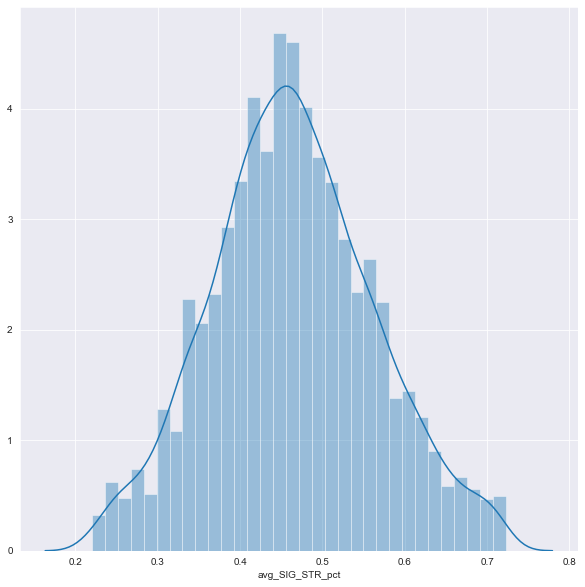

In [214]:
plt.figure(figsize=(10,10))

sns.distplot(y_nonfin.avg_SIG_STR_pct)

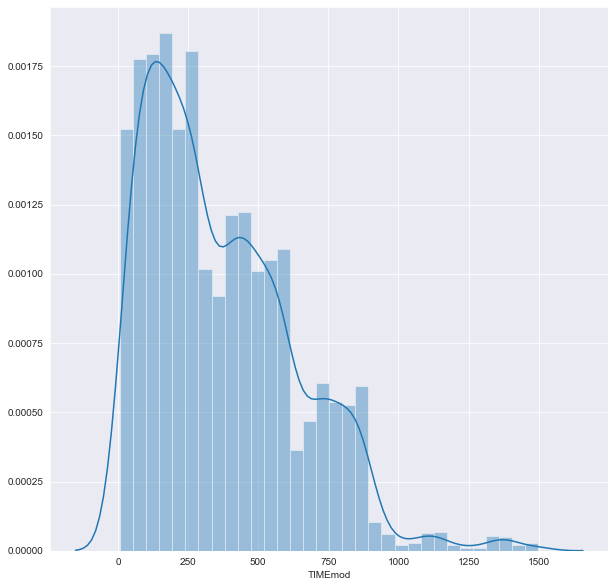

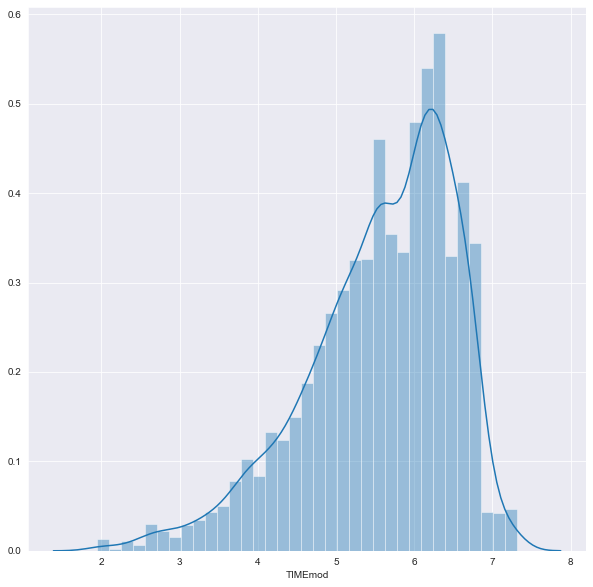

In [235]:
plt.figure(figsize=(10,10))
sns.distplot(y_nonfin.TIMEmod)
plt.show()

plt.figure(figsize=(10,10))
sns.distplot(np.log(y_nonfin.TIMEmod))
plt.show()

In [215]:
LassoCV_find_best_target(x_nonfin, y_nonfin.avg_SIG_STR_pct)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003373983360475563, tolerance: 0.002494285942233705
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034132054828681646, tolerance: 0.002494285942233705
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026668069272623995, tolerance: 0.002494285942233705
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004556183934578684, tolerance: 0.002263435746786146
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002533511608643124, tolerance: 0.002263435746786146
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011945999989539047, tolerance: 0.002263435746786146
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006261411739007627, tolerance: 0.002295330250331745
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036371210971033463, tolerance: 0.00232661005923216
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033907812210038912, tolerance: 0.00232661005923216
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011633491925110206, tolerance: 0.002367819082245179
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02844969238091366, tolerance: 0.002367819082245179
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026270075907959267, tolerance: 0.0023172038358335763
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010412712668777857, tolerance: 0.002353870465701233
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0039220488948785714, tolerance: 0.002290186521644222
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005612237826458255, tolerance: 0.002290186521644222
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002542179468662198, tolerance: 0.0022211023122882916
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002246957201261779, tolerance: 0.0022211023122882916
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004945373207931425, tolerance: 0.0022211023122882916
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008568326782686597, tolerance: 0.0022487424956547713
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008038654978395954, tolerance: 0.0022487424956547713
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007690376102075902, tolerance: 0.0022487424956547713
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007038745326788387, tolerance: 0.0023510086928146203
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009637820976717393, tolerance: 0.0023510086928146203
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016329173432581, tolerance: 0.0023510086928146203
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005356103330210971, tolerance: 0.002325567813095594
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005392531680612933, tolerance: 0.002325567813095594
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004995935473608881, tolerance: 0.002325567813095594
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027033830879467757, tolerance: 0.0022436958624145326
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017715479445612914, tolerance: 0.002369636434503267
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03986262501120308, tolerance: 0.002369636434503267
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008059708068191895, tolerance: 0.0023480523029814344
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008178708501933585, tolerance: 0.0023480523029814344
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011220285222691473, tolerance: 0.0023480523029814344
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/en

R2 for training data fitting to variable: avg_SIG_STR_pct is 0.23333495564296525. 

        CVS = 0.16949787572580513 . 

        R2 for testing data fitting to variable: avg_SIG_STR_pct is 0.1652973032077082 
.


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [216]:
LassoCV_find_best_target(x_nonfin, np.log(y_nonfin.TIMEmod))

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5840206204293281, tolerance: 0.2330802002672113
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0240300805428433, tolerance: 0.2330802002672113
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.624210666038607, tolerance: 0.2330802002672113
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46270908782662445, tolerance: 0.23079793332143056
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.131147328984298, tolerance: 0.23079793332143056
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29139888601957864, tolerance: 0.20931167448409344
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.324980423837815, tolerance: 0.21225957355646174
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.616897660324867, tolerance: 0.21225957355646174
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.833068079146642, tolerance: 0.21225957355646174
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/li

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.386849872024186, tolerance: 0.2104869531397828
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.687331257034884, tolerance: 0.2104869531397828
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.551276549867225, tolerance: 0.2104869531397828
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6277029606826545, tolerance: 0.20694706671414465
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3293693596178855, tolerance: 0.20694706671414465
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7694670012117513, tolerance: 0.20694706671414465
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7563798410124036, tolerance: 0.2086234525263295
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6798222936999991, tolerance: 0.2086234525263295
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.364937113661199, tolerance: 0.2086234525263295
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23873597505144062, tolerance: 0.2100427682605923
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8400175295487315, tolerance: 0.2100427682605923
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6589843320139153, tolerance: 0.2100427682605923
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2703450314552356, tolerance: 0.20249568547042127
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28463897035976515, tolerance: 0.20249568547042127
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30092628761826745, tolerance: 0.20249568547042127
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9364674303431002, tolerance: 0.212380257366644
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.056604491266171, tolerance: 0.212380257366644
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.656346288500799, tolerance: 0.212380257366644
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyt

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.196772434048853, tolerance: 0.21179546823893103
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0229750625769611, tolerance: 0.21179546823893103
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24223533141480402, tolerance: 0.20744952333418074
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3581940406702415, tolerance: 0.2100013590408493
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.180851671526398, tolerance: 0.2100013590408493
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.295974997209214, tolerance: 0.2100013590408493
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4344320107600197, tolerance: 0.20975415246491008
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1788759700839364, tolerance: 0.20975415246491008
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0737837962585672, tolerance: 0.20975415246491008
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.98297159271124, tolerance: 0.19967733180549688
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6404128693516213, tolerance: 0.19967733180549688
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.021762740536815, tolerance: 0.19967733180549688
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.099288353203519, tolerance: 0.20495568345215104
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.58467077800401, tolerance: 0.20495568345215104
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.53982303312637, tolerance: 0.20495568345215104
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/li

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3607166042456811, tolerance: 0.21078122021838736
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23986555439432777, tolerance: 0.21078122021838736
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28519383603656934, tolerance: 0.21078122021838736
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21860235839767483, tolerance: 0.2139280839514151
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27848723829220035, tolerance: 0.2139280839514151
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.36163975152749117, tolerance: 0.2139280839514151
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1016707853211756, tolerance: 0.210127870233817
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.784442552035216, tolerance: 0.210127870233817
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5292756099734106, tolerance: 0.210127870233817
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/py

R2 for training data fitting to variable: TIMEmod is 0.023138118671909402. 

        CVS = 0.011604023259483908 . 

        R2 for testing data fitting to variable: TIMEmod is 0.023578877082592875 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2859233430297081, tolerance: 0.20484925031086143
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3830966063997039, tolerance: 0.20484925031086143
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3390511079085172, tolerance: 0.20484925031086143
  tol, rng, random, positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [223]:
# repeating but this time splitting purely for the purposes of normalizing the avg significat str %


df_post2001_norm_str = df_post2001.loc[df_post2001.avg_SIG_STR_pct<=df_post2001.avg_SIG_STR_pct.quantile(0.975)]
df_post2001_norm_str = df_post2001_norm_str.loc[df_post2001_norm_str.avg_SIG_STR_pct>=df_post2001_norm_str.avg_SIG_STR_pct.quantile(0.025)]

x_norm_str = df_post2001_norm_str[df_post2001_norm_str.columns[1:26]]
y_norm_str = df_post2001_norm_str[df_post2001_norm_str.columns[27:]]


LassoCV_find_best_target(x_norm_str, y_norm_str.avg_SIG_STR_pct)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005972795120563035, tolerance: 0.004452015032315378
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012551612344495311, tolerance: 0.004452015032315378
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06313992538245827, tolerance: 0.004452015032315378
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023242684386435286, tolerance: 0.003983816839853141
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006121300087638559, tolerance: 0.0039954165333358944
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004909379452236351, tolerance: 0.0039954165333358944
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013659363951155967, tolerance: 0.004019024214846531
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0186066903131632, tolerance: 0.004019024214846531
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008112326559611915, tolerance: 0.004019024214846531
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/le

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0051292244951106625, tolerance: 0.004014953886907098
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019653493953690315, tolerance: 0.004014953886907098
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023545778698906616, tolerance: 0.004014953886907098
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007060243692983192, tolerance: 0.004026403775372607
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01347310249631306, tolerance: 0.004026403775372607
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02310382668357036, tolerance: 0.004026403775372607
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/le

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011212462153839198, tolerance: 0.004048639375618565
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006895143954341876, tolerance: 0.004048639375618565
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00934246861939414, tolerance: 0.004048639375618565
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014440784639919713, tolerance: 0.003974379391729539
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008505807257421338, tolerance: 0.0039013396443186433
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012004752645232486, tolerance: 0.0039013396443186433
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007385607092743385, tolerance: 0.004009484064759121
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008756206371415942, tolerance: 0.004009484064759121
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006163472455039454, tolerance: 0.004015876110940995
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/

R2 for training data fitting to variable: avg_SIG_STR_pct is 0.21802690378854583. 

        CVS = 0.18129252460774903 . 

        R2 for testing data fitting to variable: avg_SIG_STR_pct is 0.20618394122047423 
.


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [233]:
# repeating time trials but ONLY for those that were 3 round fights:

df_3round_nonfin = df_post2001.loc[df_post2001.TIMEmod<900]
x_3round_nonfin = df_3round_nonfin[df_3round_nonfin.columns[1:26]]
y_3round_nonfin = df_3round_nonfin[df_3round_nonfin.columns[27:]]

LassoCV_find_best_target(x_3round_nonfin, y_3round_nonfin.TIMEmod)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21400.23396590352, tolerance: 15424.185658570901
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25546.998033076525, tolerance: 15424.185658570901
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41754.428668409586, tolerance: 15424.185658570901
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16996.398132383823, tolerance: 15276.045437046632
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16929.12463438511, tolerance: 15276.045437046632
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181692.88401049376, tolerance: 15276.045437046632
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162117.95628897846, tolerance: 15323.566605958551
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130414.31407809258, tolerance: 15323.566605958551
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22789.853498458862, tolerance: 15323.566605958551
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/li

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639485.4740608931, tolerance: 13666.231034800494
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755884.9134729207, tolerance: 13666.231034800494
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203043.0942201167, tolerance: 13666.231034800494
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22801.2644687593, tolerance: 13912.43099736842
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35329.5585475266, tolerance: 13912.43099736842
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30501.223356366158, tolerance: 13912.43099736842
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pytho

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154777.66614484787, tolerance: 13397.521372027973
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143746.2302995175, tolerance: 13397.521372027973
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274915.65266002715, tolerance: 13397.521372027973
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49462.309080556035, tolerance: 13567.393434800495
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27991.52281858027, tolerance: 13567.393434800495
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39118.77160421014, tolerance: 13567.393434800495
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 767742.3613047749, tolerance: 14063.209373262034
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1636826.7336802483, tolerance: 14063.209373262034
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2435233.271730259, tolerance: 14063.209373262034
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23836.79450055957, tolerance: 13781.406148251748
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25021.714535742998, tolerance: 13781.406148251748
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38016.89991465211, tolerance: 13781.406148251748
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65549.31934331357, tolerance: 13867.716899342102
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123977.22690188885, tolerance: 13867.716899342102
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112827.41908603907, tolerance: 13867.716899342102
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16974.06951379776, tolerance: 13520.357915343482
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134636.49568592012, tolerance: 13520.357915343482
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100508.16134676337, tolerance: 13520.357915343482
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29318.244606882334, tolerance: 13620.054123159194
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130597.75424599648, tolerance: 13620.054123159194
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189263.4794484228, tolerance: 13620.054123159194
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996283.0546659827, tolerance: 13774.094472985196
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1676003.0677881092, tolerance: 13774.094472985196
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3889280.8786085844, tolerance: 13774.094472985196
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684495.1266347468, tolerance: 13612.20060386672
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1070303.762959823, tolerance: 13612.20060386672
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1247257.273280844, tolerance: 13612.20060386672
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyth

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843313.0056258291, tolerance: 13723.037971287536
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870104.062800765, tolerance: 13723.037971287536
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 845684.7634518743, tolerance: 13723.037971287536
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/py

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1916393.6252263635, tolerance: 13922.760346112711
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3083052.2002318203, tolerance: 13922.760346112711
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3609106.054814428, tolerance: 13922.760346112711
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40545.75032873452, tolerance: 13845.42361974496
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48337.86592385173, tolerance: 13845.42361974496
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151333.22514474392, tolerance: 13845.42361974496
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/pyt

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4447461.16517365, tolerance: 13752.180618839986
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5884461.523396343, tolerance: 13752.180618839986
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22803.377231881022, tolerance: 13908.064898519737
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130139.04141204059, tolerance: 13759.28420855615
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127029.99397458136, tolerance: 13759.28420855615
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120388.00782263279, tolerance: 13759.28420855615
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418355.69538912177, tolerance: 13411.642727108185
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136189.54804870486, tolerance: 13411.642727108185
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282475.31206585467, tolerance: 13411.642727108185
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/li

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 856179.9287955314, tolerance: 13666.900737392021
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 796085.5451915115, tolerance: 13666.900737392021
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2140592.156461835, tolerance: 13666.900737392021
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19448.076073899865, tolerance: 13788.231746998355
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45666.797585859895, tolerance: 13788.231746998355
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98492.09672574699, tolerance: 13788.231746998355
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651202.0393502116, tolerance: 13653.084200616777
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48275.60051572323, tolerance: 13380.448567722042
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57135.90890532732, tolerance: 13380.448567722042
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522513.875478521, tolerance: 13543.730934210527
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 844520.7749941349, tolerance: 13543.730934210527
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 906757.0897019804, tolerance: 13543.730934210527
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/py

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37110.07303844392, tolerance: 13361.150809498355
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24293.09423339367, tolerance: 13361.150809498355
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51521.92484045029, tolerance: 13361.150809498355
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/p

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422845.9765557945, tolerance: 13645.835443379934
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358854.61784125865, tolerance: 13645.835443379934
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243504.57917243242, tolerance: 13645.835443379934
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164390.0318376273, tolerance: 13670.133261677633
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111870.50098572671, tolerance: 13670.133261677633
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132268.23181539774, tolerance: 13670.133261677633
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10822681.417259797, tolerance: 13734.051680879933
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14454.906165495515, tolerance: 13345.619450616778
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29132.071130394936, tolerance: 13345.619450616778
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/li

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33022.994671687484, tolerance: 13428.643207894736
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59160.49538996816, tolerance: 13428.643207894736
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81043.46053121984, tolerance: 13428.643207894736
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15975.489197999239, tolerance: 13495.094977467106
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29889.717836856842, tolerance: 13495.094977467106
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60063.49355709553, tolerance: 13495.094977467106
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib

R2 for training data fitting to variable: TIMEmod is 0.018429342077168842. 

        CVS = 0.0002724544352541991 . 

        R2 for testing data fitting to variable: TIMEmod is -0.0016221016307644833 
.


/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16364.863858044147, tolerance: 13495.094977467106
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142454.8966394812, tolerance: 13495.094977467106
  tol, rng, random, positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [234]:
LassoCV_find_best_target(x_3round_nonfin, y_3round_nonfin.Red_win)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3916836429692694, tolerance: 0.06069529803776381
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07147890885175912, tolerance: 0.06069529803776381
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10768926558273506, tolerance: 0.06069529803776381
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.60032753364203, tolerance: 0.060044427989633505
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4214859726193936, tolerance: 0.060044427989633505
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34993848643000547, tolerance: 0.060044427989633505
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5176578687222673, tolerance: 0.059129237601776484
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.712240405923467, tolerance: 0.059129237601776484
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.66011491438735, tolerance: 0.059129237601776484
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16421775171659192, tolerance: 0.05916450777202066
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25073544418643223, tolerance: 0.05916450777202066
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7189250870516162, tolerance: 0.05916450777202066
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4618488824265796, tolerance: 0.05463011106540512
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30352838379667446, tolerance: 0.05463011106540512
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7419150430790751, tolerance: 0.05463011106540512
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.857178374793477, tolerance: 0.05411081859317158
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.422475079981496, tolerance: 0.05411081859317158
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17814051801747155, tolerance: 0.053501439736733845
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1236815888786964, tolerance: 0.05475664335664336
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.234443653885819, tolerance: 0.05475664335664336
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.246760623783075, tolerance: 0.05475664335664336
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06555605200770742, tolerance: 0.05463011106540513
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07149183415725702, tolerance: 0.05463011106540513
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07236042976057888, tolerance: 0.05463011106540513
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1265780568899686, tolerance: 0.054176881941587866
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23620806984763476, tolerance: 0.054176881941587866
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1785781164458626, tolerance: 0.054176881941587866
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8711096419362434, tolerance: 0.05332743726861368
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32206622565234966, tolerance: 0.05332743726861368
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7506685602282914, tolerance: 0.05332743726861368
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.046694227776754, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5437686299678148, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.384621031151255, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7933009795978023, tolerance: 0.053232524671052606
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.227538673103311, tolerance: 0.053232524671052606
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7658132709109395, tolerance: 0.053232524671052606
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.551683344135768, tolerance: 0.05440551213492393
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.399328884615102, tolerance: 0.05440551213492393
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.060829645692365375, tolerance: 0.053775565610859714
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7121576832479377, tolerance: 0.05325726038667214
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.224999285628769, tolerance: 0.05325726038667214
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4613591087372697, tolerance: 0.05325726038667214
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26350072295304017, tolerance: 0.054143891402714917
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5603200503015273, tolerance: 0.054143891402714917
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8109685897877057, tolerance: 0.054143891402714917
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5511336828477056, tolerance: 0.05301936677631576
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.56674624226224, tolerance: 0.05301936677631576
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7621600917310616, tolerance: 0.05301936677631576
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09368497941761689, tolerance: 0.05370752776635129
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09751677414527649, tolerance: 0.05370752776635129
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10208151138670019, tolerance: 0.05370752776635129
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7345246562260854, tolerance: 0.05339728506787329
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7168677790209586, tolerance: 0.05339728506787329
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.739849258412903, tolerance: 0.05339728506787329
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26198903900518644, tolerance: 0.05326776315789479
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5641330467949501, tolerance: 0.05326776315789479
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31241785743236505, tolerance: 0.05326776315789479
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.905646532824335, tolerance: 0.054566351295763024
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.122815721527502, tolerance: 0.054566351295763024
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07836500063797303, tolerance: 0.054566351295763024
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06974600841198253, tolerance: 0.052683998354586585
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.054928009028003544, tolerance: 0.052683998354586585
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09779454295346568, tolerance: 0.052683998354586585
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/le

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.524413002731535, tolerance: 0.05424261620732202
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9457418402167264, tolerance: 0.05424261620732202
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9784920985256917, tolerance: 0.05424261620732202
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.985936187310756, tolerance: 0.05298355263157894
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.459769405082966, tolerance: 0.05298355263157894
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.356927235145577, tolerance: 0.05298355263157894
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27030907716061847, tolerance: 0.05384327437268614
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30396203919946174, tolerance: 0.05384327437268614
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27223752342172247, tolerance: 0.05384327437268614
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3481450696015145, tolerance: 0.054756643356643375
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.988783095740814, tolerance: 0.054756643356643375
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.183073823506106, tolerance: 0.054756643356643375
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.830916229267302, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.33082766410621, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.951025690563881, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/l

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05471309632991961, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.057467721522584725, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1252667663256375, tolerance: 0.05430802139037435
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.246699169866474, tolerance: 0.05301936677631576
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6675793633289686, tolerance: 0.05301936677631576
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2231729793156205, tolerance: 0.05301936677631576
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3884016154916594, tolerance: 0.05470522203947373
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0094096117168192, tolerance: 0.05470522203947373
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1054121106619732, tolerance: 0.053988774671052626
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5351390383627859, tolerance: 0.0531972039473684
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0472660566954914, tolerance: 0.0531972039473684
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2385027157560557, tolerance: 0.0531972039473684
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/li

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4038247054647854, tolerance: 0.054088815789473665
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.912869263429343, tolerance: 0.054088815789473665
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.467678871664361, tolerance: 0.054088815789473665
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-en

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06211605978916168, tolerance: 0.054545888157894705
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1854356406814759, tolerance: 0.054545888157894705
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3593598843668815, tolerance: 0.054545888157894705
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4048536319542677, tolerance: 0.05395526315789471
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3279877799962492, tolerance: 0.05395526315789471
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3903382476569277, tolerance: 0.05395526315789471
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.283431110504353, tolerance: 0.052766940789473735
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.298828737077429, tolerance: 0.052766940789473735
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1295143999004722, tolerance: 0.05402220394736841
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07566429605225267, tolerance: 0.052911677631578974
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20378373209462097, tolerance: 0.052911677631578974
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24985994380608645, tolerance: 0.052911677631578974
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/lea

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08313814265500241, tolerance: 0.054481578947368464
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6349421055473954, tolerance: 0.054481578947368464
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8311309449000532, tolerance: 0.054481578947368464
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9664790698990942, tolerance: 0.053820394736842116
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.020375186966021, tolerance: 0.053820394736842116
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4937688630966477, tolerance: 0.053820394736842116
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09745107730930158, tolerance: 0.054088815789473665
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08350585126765964, tolerance: 0.054088815789473665
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27697428341366503, tolerance: 0.054088815789473665
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/lea

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8075496772553947, tolerance: 0.053372985197368404
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3612488046996987, tolerance: 0.053372985197368404
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.034497368410655, tolerance: 0.053372985197368404
  tol, rng, random, positive)
/Users/flatironschool/anaconda3/envs/learn-e

R2 for training data fitting to variable: Red_win is 0.05034244516547359. 

        CVS = 0.012615094110187509 . 

        R2 for testing data fitting to variable: Red_win is 0.008161346552922777 
.


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [236]:
pd.to_pickle(df_post2001_norm_str, 'post2001_norm_str_pct.pkl')
pd.to_pickle(df_post2001_non_finish, 'post2001_non_finish_fights.pkl')